# Sumário

1. [**Instalação de Bibliotecas, Imports e Carregamento do Arquivo**](#1.-Instalação-de-Bibliotecas,-Imports-e-Carregamento-do-Arquivo)
2. [**Base de Dados**](#2.-Base-de-Dados)
3. [**Diagnóstico e Qualidade de Dados**](#3.-Diagnóstico-e-Qualidade-de-Dados)
    - 3.1 [Análise de Metadados e Falsos Nulos](#3.1-Análise-de-Metadados-e-Falsos-Nulos)
    - 3.2 [Identificação de Outliers de Duração](#3.2-Identificação-de-Outliers-de-Duração)
    - 3.3 [Distribuição de Runtime](#3.3-Distribuição-de-Runtime)
    - 3.4 [Relevância Estatística: Votos vs Nota](#3.4-Relevância-Estatística:-Votos-vs-Nota)
4. [**Panorama Geral**](#4.-Panorama-Geral)
    - 4.1 [Indicadores Chave de Performance (KPIs) em Dashboard Cards](#4.1-Indicadores-Chave-de-Performance-(KPIs)-em-Dashboard-Cards)
    - 4.2 [Top 10 Filmes Mais Populares até 2024](#4.2-Top-10-Filmes-Mais-Populares-até-2024)
    - 4.3 [Distribuição dos Gêneros dos Filmes]()
5. [**Análise Temporal**](#5.-Análise-Temporal)
    - 5.1 [A Qualidade dos Filmes ao Longo do Tempo](#5.1-A-Qualidade-dos-Filmes-ao-Longo-do-Tempo)
    - 5.2 [Sazonalidade de Lançamentos (por mês)](#5.2-Sazonalidade-de-Lançamentos-(por-mês))
    - 5.3 [Evolução da Receita Total da Indústria Cinematográfica (1920-2024)](#5.3-Evolução-da-Receita-Total-da-Indústria-Cinematográfica-(1920-2024))
6. [**Segmentação de Mercado e Produção**](#6.-Segmentação-de-Mercado-e-Produção)
    - 6.1 [Contagem de Produtoras por Filme](#6.1-Contagem-de-Produtoras-por-Filme)
    - 6.2 [Produtoras com Mais Filmes Produzidos](#6.2-Produtoras-com-Mais-Filmes-Produzidos)
    - 6.3 [Análise da Receita por Quantidade de Produtoras](#6.3-Análise-da-Receita-por-Quantidade-de-Produtoras)
    - 6.4 [Top 15 Gêneros por Receita Total](#6.4-Top-15-Gêneros-por-Receita-Total)
    - 6.5 [Top 15 Países Produtores (por volume)](#6.5-Top-15-Países-Produtores-(por-volume))
    - 6.6 [Correlação entre Variáveis Financeiras e Popularidade](#6.6-Correlação-entre-Variáveis-Financeiras-e-Popularidade)
    - 6.7 [Duração x Popularidade]()
7. [**Análise Financeira**](#7.-Análise-Financeira)
    - 7.1 [Heatmap de ROI médio por década e gênero (top 8)](#7.1-Heatmap-de-ROI-médio-por-década-e-gênero-(top-8))
    - 7.2 [Orçamento vs Lucro](#7.2-Orçamento-vs-Lucro)

# 1. Instalação de Bibliotecas, Imports e Carregamento do Arquivo

In [ ]:
# Instalação das bibliotecas necessárias
%pip install pandas numpy matplotlib seaborn psycopg2-binary sqlalchemy --quiet

: 

In [1]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from sqlalchemy import create_engine

# Configuração da conexão com o banco de dados PostgreSQL
DB_CONFIG = {
    'host': 'localhost',
    'port': 5433,
    'database': 'grupo08',
    'user': 'postgres',
    'password': 'postgres'
}

# Criar engine de conexão
engine = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"
)

# Carregar dados da tabela silver.filmes
print("Conectando ao banco de dados PostgreSQL...")
df = pd.read_sql("SELECT * FROM silver.filmes", engine)
print(f"✅ Dados carregados com sucesso! Total de registros: {len(df):,}")
df

Conectando ao banco de dados PostgreSQL...
✅ Dados carregados com sucesso! Total de registros: 1,111,347


,id,title,original_title,original_language,release_date,release_year,release_month,release_month_name,release_day_of_week,release_day_name,...,vote_average,vote_count,popularity,budget,revenue,profit,roi,is_profitable,budget_tier,created_at
0,565770,Blue Beetle,Blue Beetle,en,2023-08-16,2023.0,8.0,Agosto,2.0,Quarta,...,7.14,1023,2994.357,120000000.0,124818235.0,4818235.0,4.015196,True,Muito Alto ($100M - $200M),2026-01-20 11:07:19.991143
1,980489,Gran Turismo,Gran Turismo,en,2023-08-09,2023.0,8.0,Agosto,2.0,Quarta,...,8.07,702,2680.593,60000000.0,114800000.0,54800000.0,91.333333,True,Alto ($50M - $100M),2026-01-20 11:07:19.991143
2,968051,The Nun II,The Nun II,en,2023-09-06,2023.0,9.0,Setembro,2.0,Quarta,...,6.55,365,1692.778,38500000.0,231200000.0,192700000.0,500.519481,True,Medio ($10M - $50M),2026-01-20 11:07:19.991143
3,615656,Meg 2: The Trench,Meg 2: The Trench,en,2023-08-02,2023.0,8.0,Agosto,2.0,Quarta,...,6.91,2034,1567.273,129000000.0,384056482.0,255056482.0,197.718203,True,Muito Alto ($100M - $200M),2026-01-20 11:07:19.991143
4,762430,Retribution,Retribution,en,2023-08-23,2023.0,8.0,Agosto,2.0,Quarta,...,6.82,258,1547.220,20000000.0,12905464.0,-7094536.0,-35.472680,False,Medio ($10M - $50M),2026-01-20 11:07:19.991143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111342,1220014,Desert Jewel: Dunhuang,Desert Jewel: Dunhuang,en,None,NaN,NaN,None,NaN,None,...,6.75,4,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-20 11:07:19.991143
1111343,1408544,Derby Days Budapest: The Most Ferocious Derby ...,Derby Days Budapest: The Most Ferocious Derby ...,en,2014-09-27,2014.0,9.0,Setembro,5.0,Sabado,...,0.00,0,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-20 11:07:19.991143
1111344,1598535,Marquis De Sade: The Depraved Aristocrat,Marquis De Sade: The Depraved Aristocrat,en,None,NaN,NaN,None,NaN,None,...,0.00,0,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-20 11:07:19.991143
1111345,1408540,décompte,décompte,fr,2012-04-28,2012.0,4.0,Abril,5.0,Sabado,...,0.00,0,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-20 11:07:19.991143


# 2. Base de Dados

### Sobre
O presente projeto utiliza o dataset do **TMDB (The Movie Database)**, uma base que compila metadados de aproximadamente 1 milhão de obras cinematográficas. Os dados estão armazenados na camada **Silver** do banco de dados PostgreSQL, contendo dados limpos e transformados com 29 colunas, incluindo variáveis como títulos, gêneros, orçamentos, receitas, índices de popularidade e métricas derivadas (ROI, profit, etc.). Pela sua amplitude e profundidade histórica, a base é ideal para estudos de ciência de dados, análises de tendências de mercado e desenvolvimento de sistemas de recomendação.

### Conexão com o Banco de Dados
- **Host**: localhost
- **Porta**: 5433
- **Database**: grupo08
- **Schema**: silver
- **Tabela**: filmes

Para fins de verificação e conferência da estrutura, apresentam-se abaixo os **cinco registros iniciais**.

In [2]:
df

,id,title,original_title,original_language,release_date,release_year,release_month,release_month_name,release_day_of_week,release_day_name,...,vote_average,vote_count,popularity,budget,revenue,profit,roi,is_profitable,budget_tier,created_at
0,565770,Blue Beetle,Blue Beetle,en,2023-08-16,2023.0,8.0,Agosto,2.0,Quarta,...,7.14,1023,2994.357,120000000.0,124818235.0,4818235.0,4.015196,True,Muito Alto ($100M - $200M),2026-01-20 11:07:19.991143
1,980489,Gran Turismo,Gran Turismo,en,2023-08-09,2023.0,8.0,Agosto,2.0,Quarta,...,8.07,702,2680.593,60000000.0,114800000.0,54800000.0,91.333333,True,Alto ($50M - $100M),2026-01-20 11:07:19.991143
2,968051,The Nun II,The Nun II,en,2023-09-06,2023.0,9.0,Setembro,2.0,Quarta,...,6.55,365,1692.778,38500000.0,231200000.0,192700000.0,500.519481,True,Medio ($10M - $50M),2026-01-20 11:07:19.991143
3,615656,Meg 2: The Trench,Meg 2: The Trench,en,2023-08-02,2023.0,8.0,Agosto,2.0,Quarta,...,6.91,2034,1567.273,129000000.0,384056482.0,255056482.0,197.718203,True,Muito Alto ($100M - $200M),2026-01-20 11:07:19.991143
4,762430,Retribution,Retribution,en,2023-08-23,2023.0,8.0,Agosto,2.0,Quarta,...,6.82,258,1547.220,20000000.0,12905464.0,-7094536.0,-35.472680,False,Medio ($10M - $50M),2026-01-20 11:07:19.991143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111342,1220014,Desert Jewel: Dunhuang,Desert Jewel: Dunhuang,en,None,NaN,NaN,None,NaN,None,...,6.75,4,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-20 11:07:19.991143
1111343,1408544,Derby Days Budapest: The Most Ferocious Derby ...,Derby Days Budapest: The Most Ferocious Derby ...,en,2014-09-27,2014.0,9.0,Setembro,5.0,Sabado,...,0.00,0,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-20 11:07:19.991143
1111344,1598535,Marquis De Sade: The Depraved Aristocrat,Marquis De Sade: The Depraved Aristocrat,en,None,NaN,NaN,None,NaN,None,...,0.00,0,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-20 11:07:19.991143
1111345,1408540,décompte,décompte,fr,2012-04-28,2012.0,4.0,Abril,5.0,Sabado,...,0.00,0,0.000,NaN,NaN,NaN,NaN,None,None,2026-01-20 11:07:19.991143


In [3]:
# Mostrar as 5 primeiras linhas do DataFrame
df.head(5)

,id,title,original_title,original_language,release_date,release_year,release_month,release_month_name,release_day_of_week,release_day_name,...,vote_average,vote_count,popularity,budget,revenue,profit,roi,is_profitable,budget_tier,created_at
0,565770,Blue Beetle,Blue Beetle,en,2023-08-16,2023.0,8.0,Agosto,2.0,Quarta,...,7.14,1023,2994.357,120000000.0,124818235.0,4818235.0,4.015196,True,Muito Alto ($100M - $200M),2026-01-20 11:07:19.991143
1,980489,Gran Turismo,Gran Turismo,en,2023-08-09,2023.0,8.0,Agosto,2.0,Quarta,...,8.07,702,2680.593,60000000.0,114800000.0,54800000.0,91.333333,True,Alto ($50M - $100M),2026-01-20 11:07:19.991143
2,968051,The Nun II,The Nun II,en,2023-09-06,2023.0,9.0,Setembro,2.0,Quarta,...,6.55,365,1692.778,38500000.0,231200000.0,192700000.0,500.519481,True,Medio ($10M - $50M),2026-01-20 11:07:19.991143
3,615656,Meg 2: The Trench,Meg 2: The Trench,en,2023-08-02,2023.0,8.0,Agosto,2.0,Quarta,...,6.91,2034,1567.273,129000000.0,384056482.0,255056482.0,197.718203,True,Muito Alto ($100M - $200M),2026-01-20 11:07:19.991143
4,762430,Retribution,Retribution,en,2023-08-23,2023.0,8.0,Agosto,2.0,Quarta,...,6.82,258,1547.220,20000000.0,12905464.0,-7094536.0,-35.472680,False,Medio ($10M - $50M),2026-01-20 11:07:19.991143


# 3. Diagnóstico e Qualidade de Dados

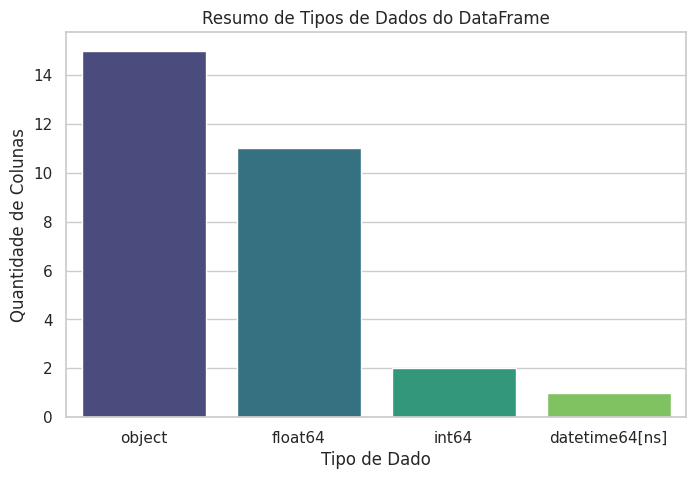

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de tipos de dados
tipo_counts = df.dtypes.value_counts()

# Estilo
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=tipo_counts.index.astype(str),
    y=tipo_counts.values,
    hue=tipo_counts.index.astype(str),
    palette="viridis",
    legend=False
)

plt.title("Resumo de Tipos de Dados do DataFrame")
plt.xlabel("Tipo de Dado")
plt.ylabel("Quantidade de Colunas")
plt.show()


## 3.1 Análise de Metadados e Falsos Nulos

### Análise de Nulos - Numérico
Verifica valores que não deveriam estar marcados com 0 e sim vazios, tendo em vista que, em finanças e duração, 0 geralmente significa 'dado não coletado'.


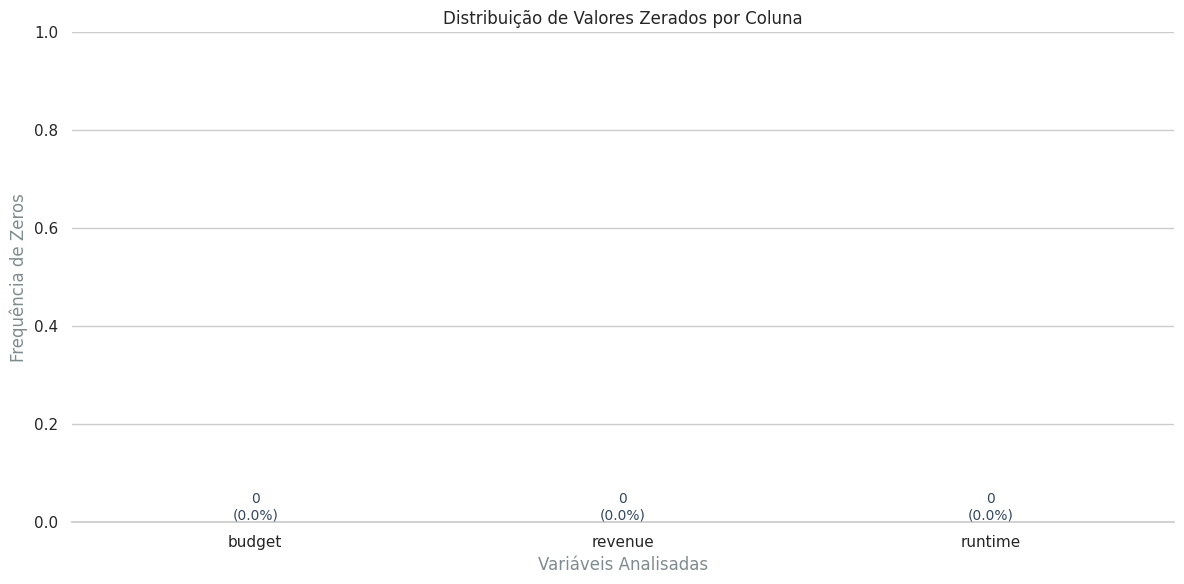

In [5]:
cols_zero = ['budget', 'revenue', 'runtime']

data = []
total = len(df)

for col in cols_zero:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        zeros = (df[col] == 0).sum()
        pct = (zeros / total) * 100
        data.append({
            'coluna': col,
            'zeros': zeros,
            'percentual': pct
        })

zeros_df = pd.DataFrame(data)
zeros_df = zeros_df.sort_values('zeros', ascending=False)

# Gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=zeros_df, 
    x='coluna', 
    y='zeros', 
    hue='coluna',      
    palette="viridis", 
    legend=False,      
    linewidth=1
)

plt.title('Distribuição de Valores Zerados por Coluna')
plt.xlabel('Variáveis Analisadas', fontsize=12, color='#7f8c8d')
plt.ylabel('Frequência de Zeros', fontsize=12, color='#7f8c8d')

# Remoção de bordas
sns.despine(left=True, bottom=False)

for i, row in enumerate(zeros_df.itertuples()):
    ax.text(
        i, 
        row.zeros + (zeros_df['zeros'].max() * 0.01), 
        f"{row.zeros}\n({row.percentual:.1f}%)", 
        ha='center', 
        va='bottom',
        fontsize=10,
        color='#34495e'
    )

# Ajuste de margens e limites
plt.ylim(0, max(1, zeros_df['zeros'].max() * 1.15))
plt.tight_layout()

plt.show()

### Análise de Nulos - Strings
Verifica colunas que deveriam ter conteúdo mas podem estar vazias ou apenas com espaços


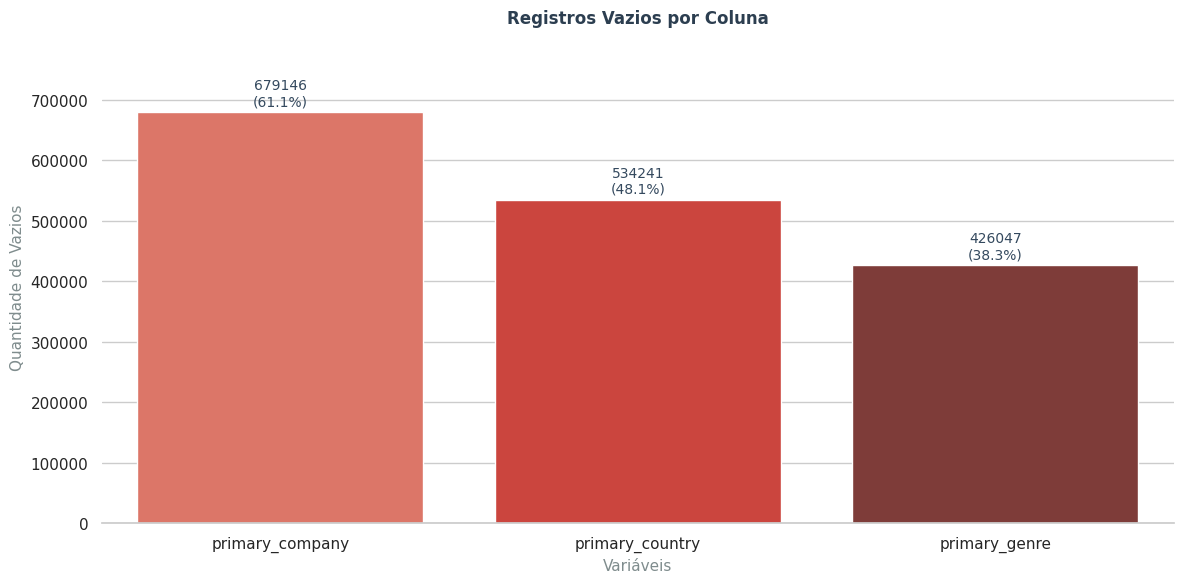

In [6]:
cols_list = ['primary_genre', 'primary_company', 'primary_country']

data = []
total = len(df)

for col in cols_list:
    if col in df.columns:
        vazios = (
            df[col].isna().sum()
            + (df[col].astype(str).str.strip() == "").sum()
        )
        pct = (vazios / total) * 100
        data.append({
            'coluna': col,
            'vazios': vazios,
            'percentual': pct
        })

vazios_df = pd.DataFrame(data)
vazios_df = vazios_df.sort_values('vazios', ascending=False)

# Gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=vazios_df, 
    x='coluna', 
    y='vazios', 
    hue='coluna', 
    palette='Reds_d', 
    legend=False,
    linewidth=1
)

plt.title('Registros Vazios por Coluna', fontsize=12, fontweight='bold', pad=20, loc='center', color='#2c3e50')
plt.xlabel('Variáveis', fontsize=11, color='#7f8c8d')
plt.ylabel('Quantidade de Vazios', fontsize=11, color='#7f8c8d')

sns.despine(left=True, bottom=False)

for i, row in enumerate(vazios_df.itertuples()):
    ax.text(
        i, 
        row.vazios + (vazios_df['vazios'].max() * 0.01), 
        f"{row.vazios}\n({row.percentual:.1f}%)", 
        ha='center', 
        va='bottom',
        fontsize=10,
        color='#34495e'
    )

plt.ylim(0, vazios_df['vazios'].max() * 1.15)
plt.tight_layout()

plt.show()


## 3.2 Identificação de Outliers de Duração

### Duplicidade de Filme
Busca encontrar filmes com mesmo título e data de lançamento para entender se há duplicidade na base;


 Verificação de Duplicidade Lógica:
 - Filmes com mesmo Título e Data de Lançamento: 2 registros
   Exemplos de duplicados:
       title release_date
768736  None         None


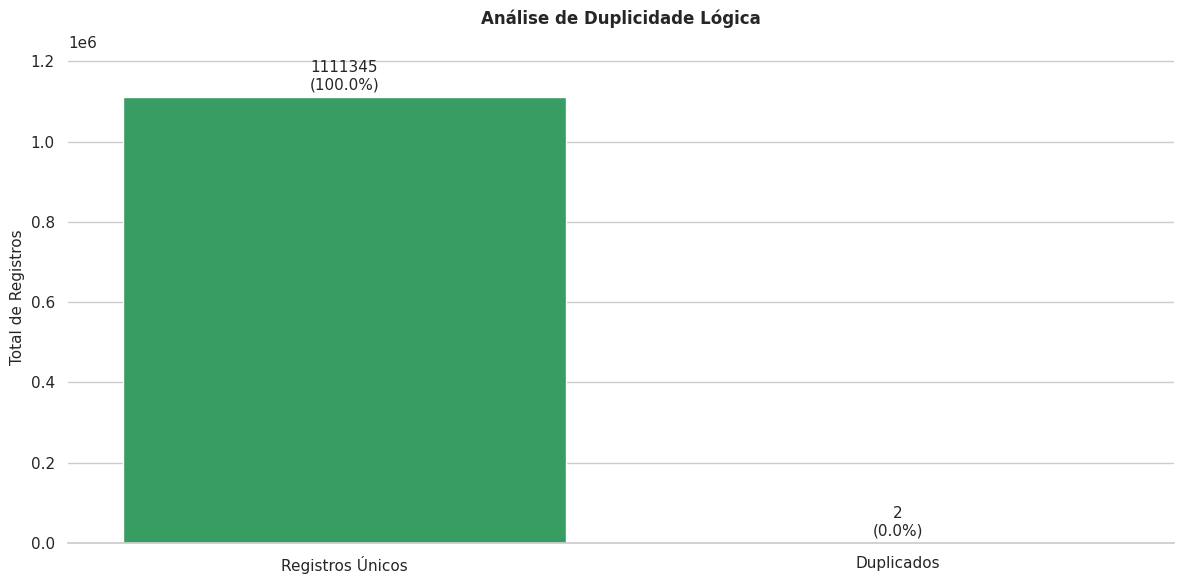

In [7]:
print("\n Verificação de Duplicidade Lógica:")
duplicados = df.duplicated(subset=['title', 'release_date'], keep=False).sum()
print(f" - Filmes com mesmo Título e Data de Lançamento: {duplicados} registros")
print("   Exemplos de duplicados:")
duplicados_df = df[df.duplicated(subset=['title', 'release_date'], keep=False)]
print(duplicados_df[['title', 'release_date']].drop_duplicates().head(10))



# Gráfico
total = len(df)
duplicados = df.duplicated(subset=['title', 'release_date'], keep=False).sum()
unicos = total - duplicados

dados_plot = pd.DataFrame({
    'Status': ['Registros Únicos', 'Duplicados'],
    'Quantidade': [unicos, duplicados],
    'Percentual': [(unicos/total)*100, (duplicados/total)*100]
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=dados_plot,
    x='Status',
    y='Quantidade',
    hue='Status',
    palette=['#27ae60', '#e74c3c'],
    legend=False
    )

plt.title('Análise de Duplicidade Lógica', fontsize=12, fontweight='bold', pad=20, loc='center')
plt.ylabel('Total de Registros', fontsize=11)
plt.xlabel('', fontsize=11)

sns.despine(left=True)

for i, row in enumerate(dados_plot.itertuples()):
    ax.text(
        i, 
        row.Quantidade + (total * 0.01), 
        f"{row.Quantidade}\n({row.Percentual:.1f}%)", 
        ha='center', 
        va='bottom',
        fontsize=11
    )

plt.ylim(0, total * 1.1)
plt.tight_layout()

plt.show()

### Análise de Datas e Status
Busca identificar filmes sem data de lançamento ou marcados como lançado mas com data futura.


Inconsistência de Datas e Status:
 - Filmes 'Lançados' com data futura: 0
 - Filmes sem nenhuma data: 221976


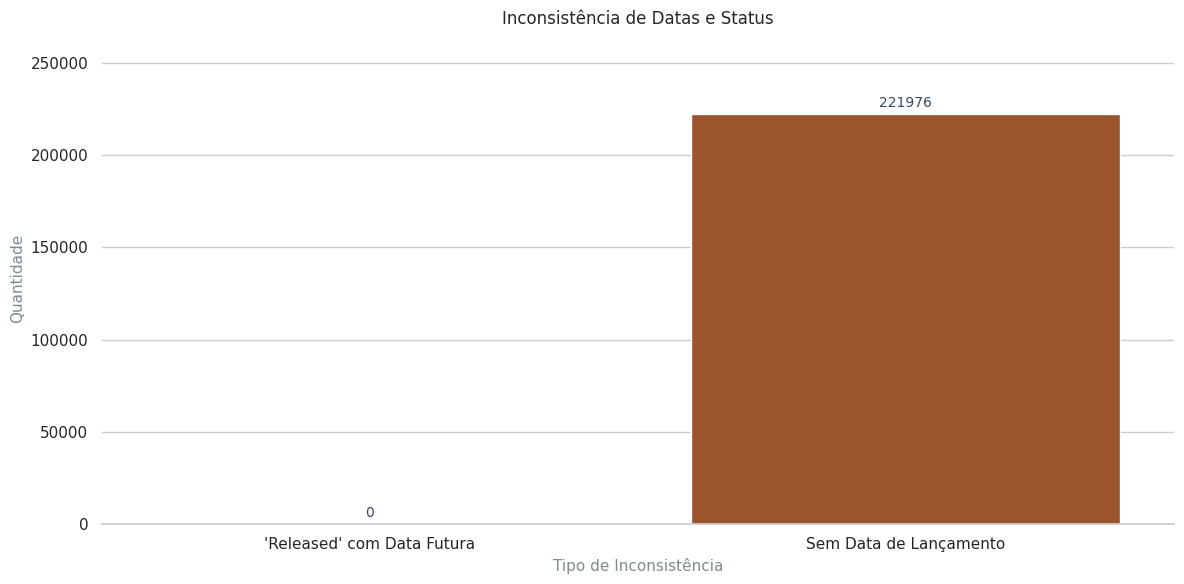

In [8]:
print("\nInconsistência de Datas e Status:")
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
hoje = pd.Timestamp.now()

futuros = df[(df['status'] == 'Released') & (df['release_date'] > hoje)].shape[0]
# Filmes sem data de lançamento
sem_data = df['release_date'].isna().sum()

print(f" - Filmes 'Lançados' com data futura: {futuros}")
print(f" - Filmes sem nenhuma data: {sem_data}")

# Gráfico
inconsistencias_df = pd.DataFrame({
    'Categoria': ["'Released' com Data Futura", "Sem Data de Lançamento"],
    'Quantidade': [futuros, sem_data]
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=inconsistencias_df,
    x='Categoria',
    y='Quantidade',
    hue='Categoria',
    palette='Oranges_d',
    legend=False,
    linewidth=1
)

plt.title('Inconsistência de Datas e Status')
plt.xlabel('Tipo de Inconsistência', fontsize=11, color='#7f8c8d')
plt.ylabel('Quantidade', fontsize=11, color='#7f8c8d')

sns.despine(left=True, bottom=False)

for i, row in enumerate(inconsistencias_df.itertuples()):
    ax.text(
        i, 
        row.Quantidade + (max(inconsistencias_df['Quantidade']) * 0.01), 
        f"{row.Quantidade}", 
        ha='center', 
        va='bottom',
        fontsize=10,
        color='#34495e'
    )

plt.ylim(0, max(inconsistencias_df['Quantidade']) * 1.2)
plt.tight_layout()

plt.show()

## 3.3 Distribuição de Runtime

Podemos observar uma mudança significativa na nossa amostra da distribuição de **Runtime** após o ETL. Agora é possível ver uma variação de até **4%** nos filmes de **0–30 minutos**.  
Essa diferença ocorre devido à exclusão de filmes com duração zero e também à remoção de filmes adultos, o que gera essa distinção em relação à camada **RAW**.


### Distribuição de Runtime por Intervalos

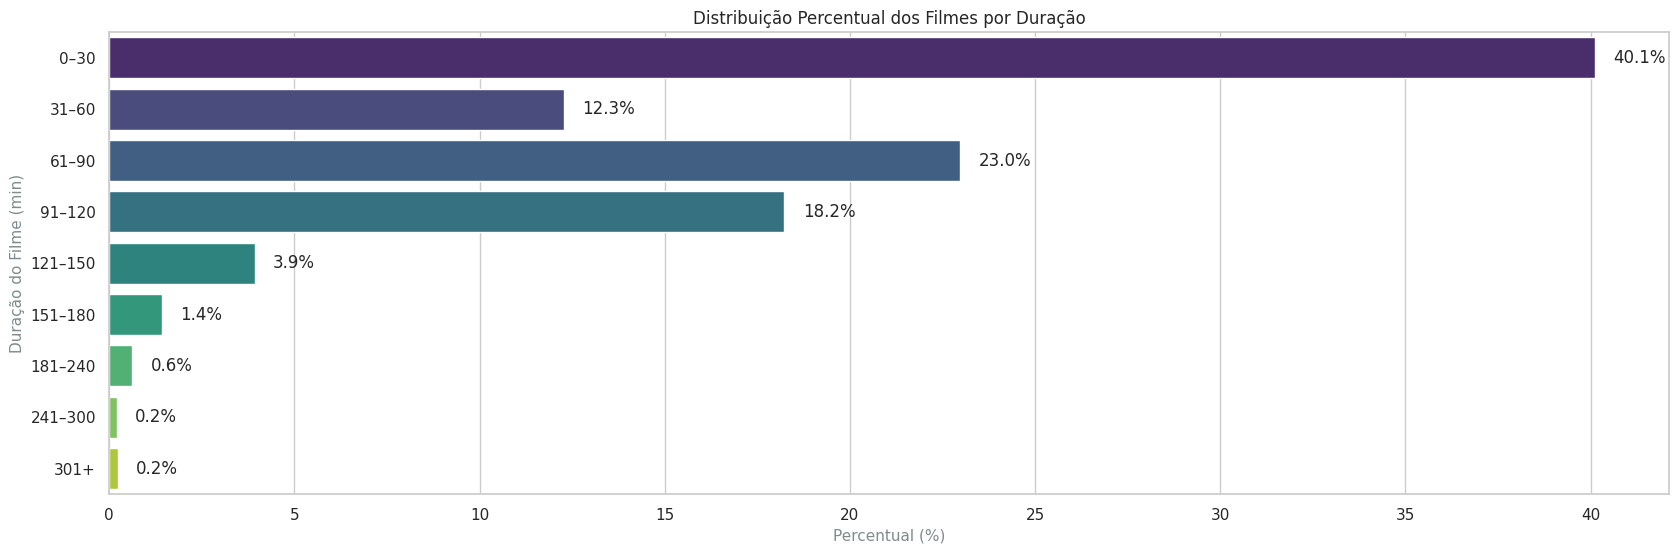

Faixa 0–30: 316115 filmes
Faixa 31–60: 96734 filmes
Faixa 61–90: 181047 filmes
Faixa 91–120: 143661 filmes
Faixa 121–150: 30925 filmes
Faixa 151–180: 11171 filmes
Faixa 181–240: 4925 filmes
Faixa 241–300: 1565 filmes
Faixa 301+: 1799 filmes


In [9]:
# Converte runtime para numérico
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df_limpo = df.dropna(subset=['runtime'])
df_limpo = df_limpo[(df_limpo['runtime'] >= 1) & (df_limpo['runtime'] <= 600)]

# Intervalos
bins = [0, 30, 60, 90, 120, 150, 180, 240, 300, 600]
labels = [
    '0–30', '31–60', '61–90', '91–120',
    '121–150', '151–180', '181–240',
    '241–300', '301+'
]

df_limpo['runtime_range'] = pd.cut(
    df_limpo['runtime'],
    bins=bins,
    labels=labels,
    right=True
)

# Contagem e percentual
runtime_counts = df_limpo['runtime_range'].value_counts().sort_index()
percentual = (runtime_counts / runtime_counts.sum()) * 100

plot_df = percentual.reset_index()
plot_df.columns = ['Intervalo (min)', 'Percentual']

# Gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.2, right=1.5)

ax = sns.barplot(
    data=plot_df,
    x='Percentual',
    y='Intervalo (min)',
    hue='Intervalo (min)',
    palette="viridis",
    legend=False
)

plt.title('Distribuição Percentual dos Filmes por Duração')
plt.xlabel('Percentual (%)', fontsize=11, color='#7f8c8d')
plt.ylabel('Duração do Filme (min)', fontsize=11, color='#7f8c8d')

# Rótulos
for i, v in enumerate(plot_df['Percentual']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

plt.show()

# Print quantos filmes tem por faixa
for i, row in plot_df.iterrows():
    print(f"Faixa {row['Intervalo (min)']}: {int((row['Percentual'] / 100) * len(df_limpo))} filmes")

### Distribuição de Runtime por Década

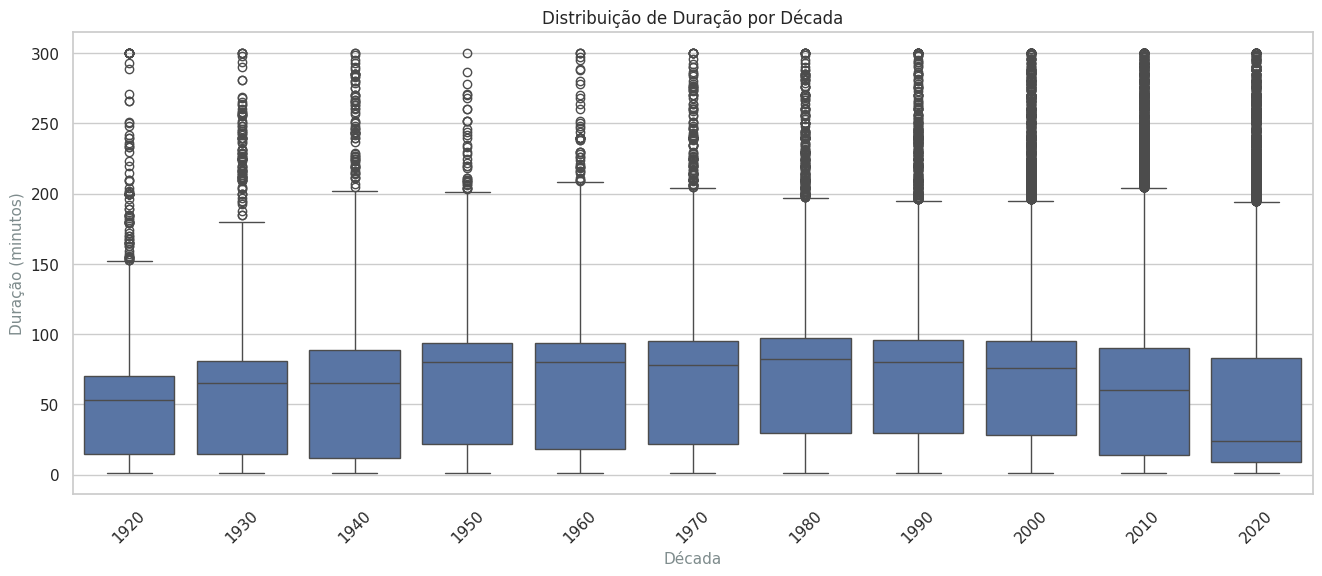

In [10]:
df['decade'] = (df['release_date'].dt.year // 10 * 10).dropna().astype(int).astype(str)
# Remove runtime maior que 300 minutos 
df = df[df['runtime'] <= 300]
# Ordem das décadas
ordem_decadas = sorted(df['decade'].dropna().unique())

plt.figure(figsize=(16,6))

sns.boxplot(
    x='decade', 
    y='runtime', 
    data=df[df['runtime'] > 0], 
    order=ordem_decadas,
    legend=False
)

# Títulos e rótulos
plt.title('Distribuição de Duração por Década')
plt.ylabel('Duração (minutos)', fontsize=11, color='#7f8c8d')
plt.xlabel('Década', fontsize=11, color='#7f8c8d')

plt.xticks(rotation=45)

plt.show()

## 3.4 Relevância Estatística: Votos vs Nota

### Identificação de Falsos Populares

Abaixo, faremos uma análise sobre os outliers, valores que podem ser erros ou exceções na base.

Com as análises anteriores, podemos concluir que múltiplos filmes da base de dados do IMDb estão com nota 10 porém sem nenhum voto, o que gera certa inconsistência nos dados. Para a camada silver, esses outliers foram retirados, assim como todos os filmes com menos de 1.000 votos distintos, tendo em vista que o IMDb considera confiável apenas médias de nota a partir dessa contagem.

/tmp/ipykernel_52481/765596227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
/tmp/ipykernel_52481/765596227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')


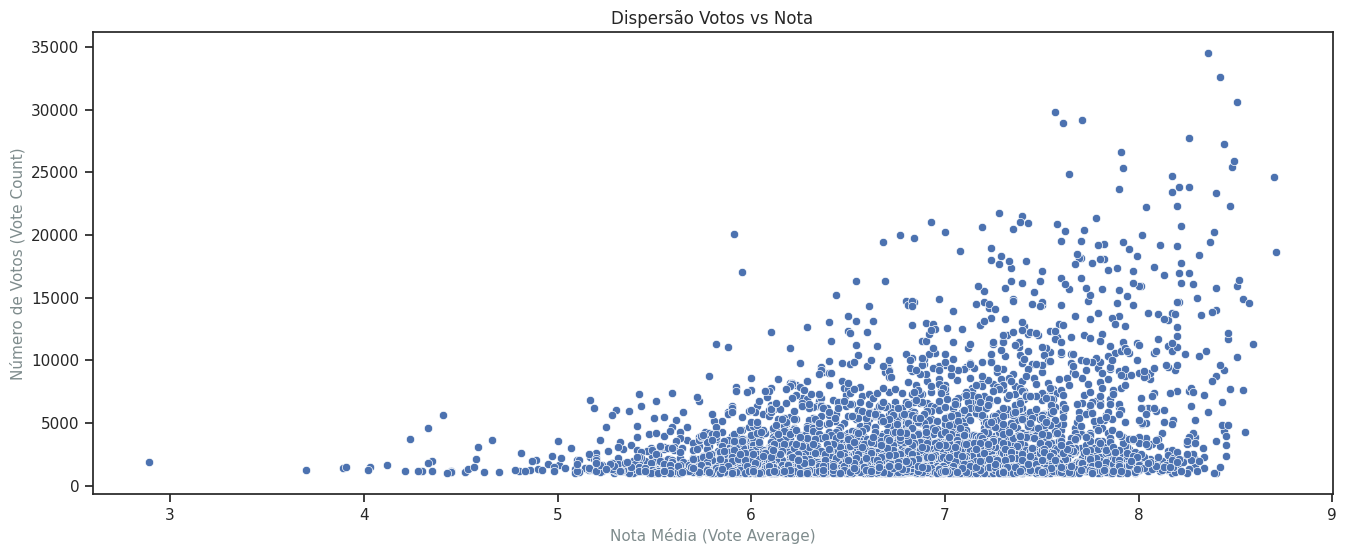

Possíveis outliers (poucos votos, nota alta) - removidos da análise:
Empty DataFrame
Columns: [title, vote_average, vote_count]
Index: []


In [11]:
# Converte para numérico e remove NaN
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df_limpo = df.dropna(subset=['vote_average', 'vote_count'])
df_limpo = df_limpo[df_limpo['vote_count'] >= 1000]

# Gráfico de dispersão

sns.set_style('ticks')
plt.figure(figsize=(16,6))
sns.scatterplot(x='vote_average', y='vote_count', data=df_limpo)
plt.title('Dispersão Votos vs Nota')
plt.xlabel('Nota Média (Vote Average)', fontsize=11, color='#7f8c8d')
plt.ylabel('Número de Votos (Vote Count)', fontsize=11, color='#7f8c8d')
plt.show()

# Identificar possíveis outliers: filmes com poucos votos mas notas altas
outliers = df_limpo[(df_limpo['vote_count'] < 100) & (df_limpo['vote_average'] > 8)].sort_values('vote_average', ascending=False)
print("Possíveis outliers (poucos votos, nota alta) - removidos da análise:")
print(outliers[['title', 'vote_average', 'vote_count']].head(10))

## 4. Panorama Geral

### 4.1 Indicadores Chave de Performance (KPIs) em Dashboard Cards

Este gráfico apresenta um conjunto de Indicadores Chave de Performance (KPIs), facilitando a leitura de padrões e comparações relevantes.


/tmp/ipykernel_52481/2567519424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
/tmp/ipykernel_52481/2567519424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
/tmp/ipykernel_52481/2567519424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

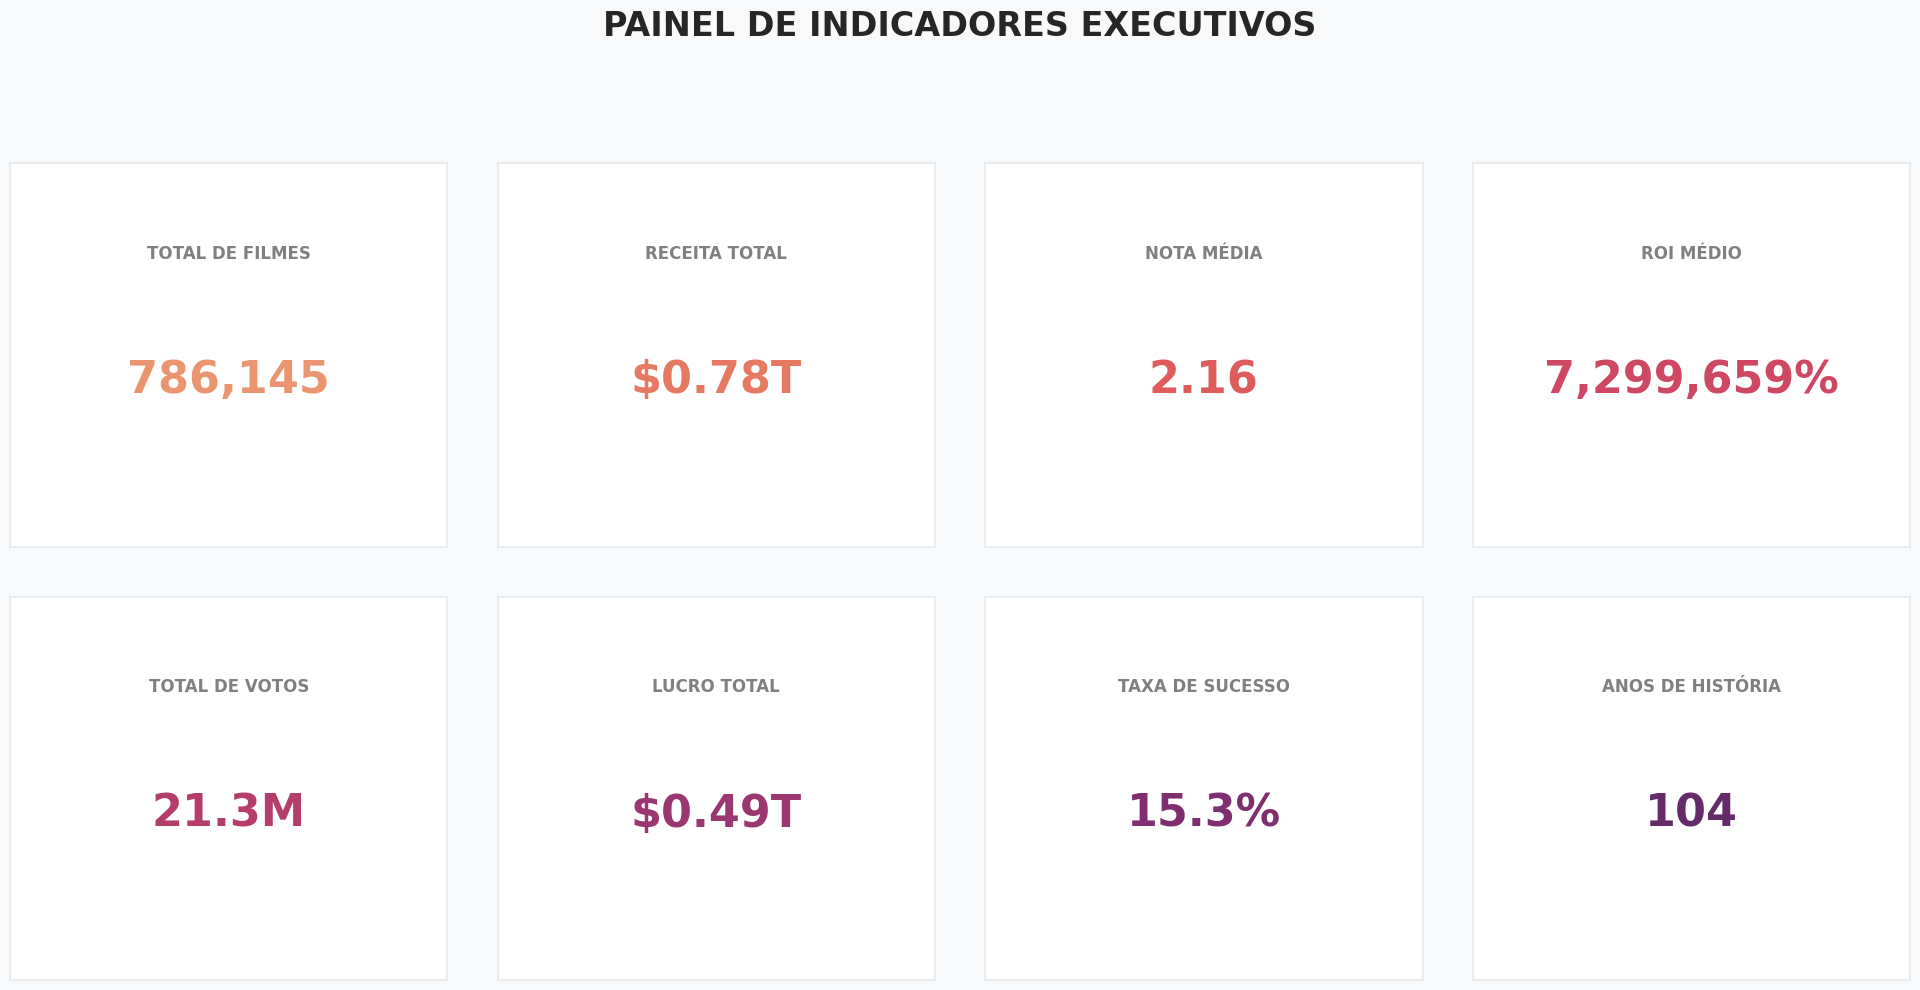

In [12]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce').fillna(0)

data_min = pd.to_datetime(df['release_date'], errors='coerce').min()
data_max = pd.to_datetime(df['release_date'], errors='coerce').max()

# Cálculo dos KPIs
total_filmes = len(df)
receita_total = df['revenue'].sum()
lucro_total = receita_total - df['budget'].sum()
nota_media_geral = df['vote_average'].mean()
votos_totais = df['vote_count'].sum()

# ROI e Sucesso 
tem_budget = df[df['budget'] > 0]
roi_medio = ((tem_budget['revenue'] - tem_budget['budget']) / tem_budget['budget']).mean() * 100
taxa_sucesso = (len(tem_budget[tem_budget['revenue'] > tem_budget['budget']]) / len(tem_budget) * 100) if len(tem_budget) > 0 else 0
span_anos = int(data_max.year - data_min.year) if pd.notnull(data_max) else 0

# Gráfico
sns.set_theme(style="white")
cores = sns.color_palette("flare", 8)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.patch.set_facecolor('#F8F9FA') 
fig.suptitle('PAINEL DE INDICADORES EXECUTIVOS', fontsize=24, fontweight='bold', y=1.02)

# Lista organizada
dados_kpi = [
    ('TOTAL DE FILMES', f'{total_filmes:,}'),
    ('RECEITA TOTAL', f'${receita_total/1e12:.2f}T'),
    ('NOTA MÉDIA', f'{nota_media_geral:.2f}'),
    ('ROI MÉDIO', f'{roi_medio:,.0f}%'),
    ('TOTAL DE VOTOS', f'{votos_totais/1e6:.1f}M'),
    ('LUCRO TOTAL', f'${lucro_total/1e12:.2f}T'),
    ('TAXA DE SUCESSO', f'{taxa_sucesso:.1f}%'),
    ('ANOS DE HISTÓRIA', f'{span_anos}')
]

for i, ax in enumerate(axes.flatten()):
    ax.set_facecolor('white')
    for s in ax.spines.values():
        s.set_visible(True)
        s.set_color('#E9ECEF')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Texto: Título (Cima) e Valor (Centro)
    ax.text(0.5, 0.75, dados_kpi[i][0], ha='center', fontsize=12, fontweight='bold', color='gray', transform=ax.transAxes)
    ax.text(0.5, 0.40, dados_kpi[i][1], ha='center', fontsize=32, fontweight='black', color=cores[i], transform=ax.transAxes)

plt.tight_layout(pad=3.0)
plt.show()

### 4.2 Top 10 Filmes Mais Populares até 2024

Abaixo estão os 10 filmes com **mais votos** no IMDb até 2024, refletindo a popularidade em relação aos votos do público, observe que a popularidade não está ligada diretamente a qualidade, já que vários filmes com notas menores, estão mais populares que filmes mais bem colocados no quesito técnico e de nota

/tmp/ipykernel_52481/1499681178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
/tmp/ipykernel_52481/1499681178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')


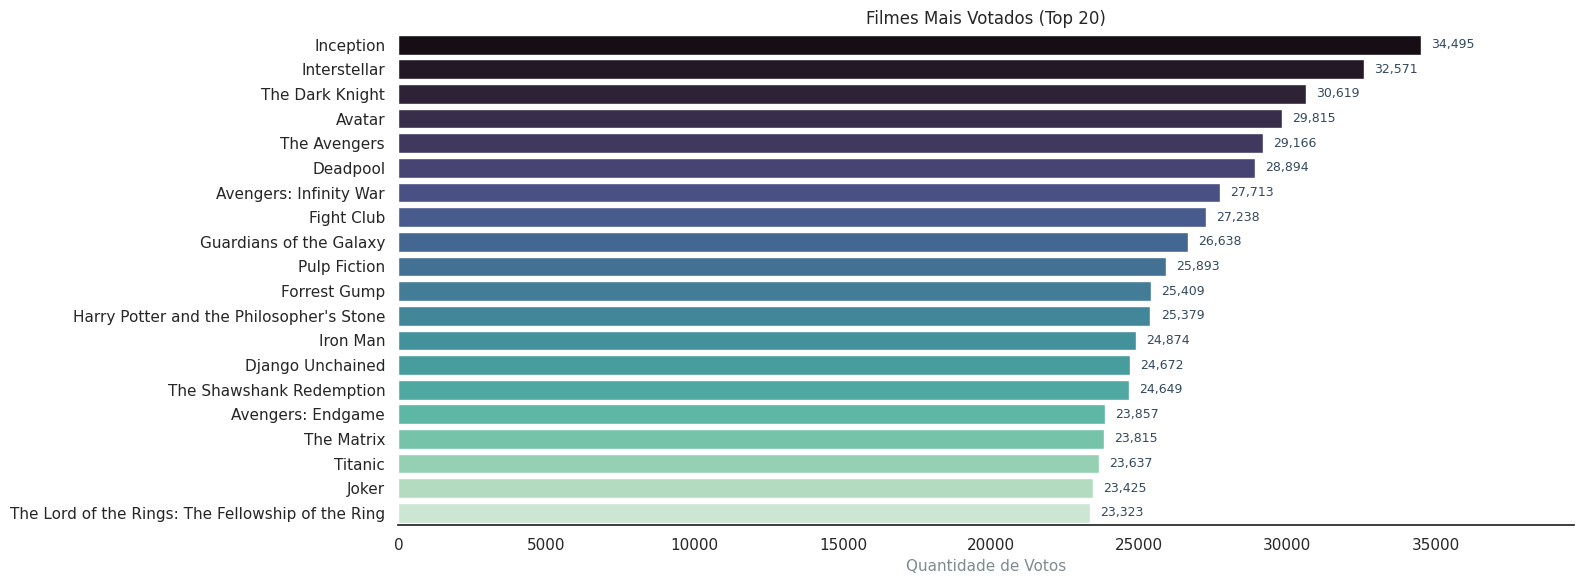

In [13]:
# Garante colunas numéricas
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
import matplotlib.pyplot as plt
import seaborn as sns

# Preparação dos dados
top_20 = (
    df.dropna(subset=['vote_count', 'title'])
      .sort_values('vote_count', ascending=False)
      .head(20)
)

# Configuração de Estilo
plt.figure(figsize=(16,6))

# Gráfico de barras horizontal para melhor leitura dos títulos dos filmes
ax = sns.barplot(
    data=top_20,
    x='vote_count',
    y='title',
    hue='title',
    palette='mako',
    legend=False,
    linewidth=1
)

# Título e Rótulos
plt.title('Filmes Mais Votados (Top 20)')
plt.xlabel('Quantidade de Votos', fontsize=11, color='#7f8c8d')
plt.ylabel('', fontsize=11) 

# Remoção de bordas
sns.despine(left=True, bottom=False)

# Anotações
for i, v in enumerate(top_20['vote_count']):
    ax.text(
        v + (top_20['vote_count'].max() * 0.01), 
        i, 
        f'{int(v):,}', 
        va='center',
        fontsize=9,
        color='#34495e'
    )

plt.xlim(0, top_20['vote_count'].max() * 1.15)
plt.tight_layout()

plt.show()

### 4.3 Distribuição dos Gêneros dos filmes

O gráfico de pizza apresenta a distribuição dos gêneros cinematográficos presentes no dataset. Observa-se a predominância de alguns gêneros específicos, enquanto os demais aparecem com menor representatividade, evidenciando a diversidade de categorias na base analisada.
Podemos observar uma pequena alteração de **1–2%** nos gêneros **Romance** e **Drama**, assim como pequenas frações de porcentagem foram retiradas de gêneros como **Documentário**.  
Essas mudanças refletem a **remoção de filmes adultos** e a **limpeza de outliers**.


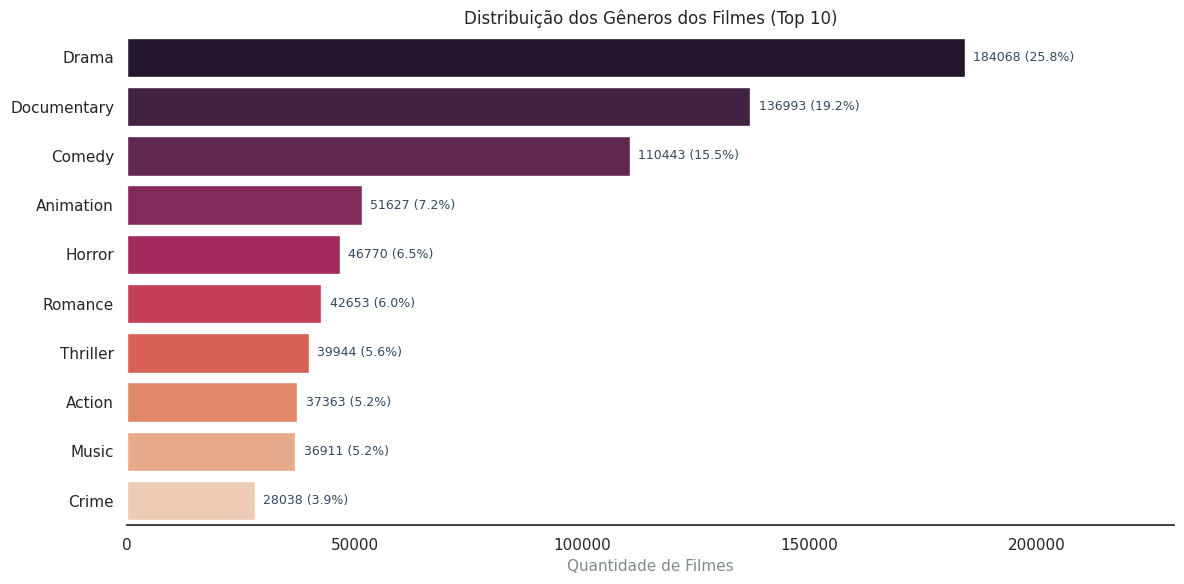

In [14]:
# Remover valores nulos
df = df.dropna(subset=['genres'])

# Explora os gêneros 
generos = df['genres'].dropna().str.split(',').explode().str.strip()
contagem_generos = generos.value_counts().head(10).reset_index()
contagem_generos.columns = ['Gênero', 'Quantidade']
total_top_10 = contagem_generos['Quantidade'].sum()
contagem_generos['Percentual'] = (contagem_generos['Quantidade'] / total_top_10) * 100

plt.figure(figsize=(12,6))

# Gráfico de barras horizontal
ax = sns.barplot(
    data=contagem_generos,
    x='Quantidade',
    y='Gênero',
    hue='Gênero',
    palette='rocket',
    legend=False,
    linewidth=1
)

# Título e Rótulos
plt.title('Distribuição dos Gêneros dos Filmes (Top 10)')
plt.xlabel('Quantidade de Filmes', fontsize=11, color='#7f8c8d')
plt.ylabel('', fontsize=11)

# Remoção de bordas
sns.despine(left=True, bottom=False)

# Anotações (Quantidade + Percentual do Top 10)
for i, row in enumerate(contagem_generos.itertuples()):
    ax.text(
        row.Quantidade + (contagem_generos['Quantidade'].max() * 0.01), 
        i, 
        f'{int(row.Quantidade)} ({row.Percentual:.1f}%)', 
        va='center',
        fontsize=9,
        color='#34495e'
    )

plt.xlim(0, contagem_generos['Quantidade'].max() * 1.25)
plt.tight_layout()

plt.show()

## 5. Análise Temporal

### 5.1 A Qualidade dos Filmes ao Longo do Tempo

Será que a qualidade dos filmes melhorou com o passar das décadas, ou a qualidade geral cinematógráfica está decaindo? 
Obviamente o padrão de exigência do telespectador aumentou, pórem, será que mesmo com um aumento das avaliações, a média geral dos filmes se mantém?

Os gráficos abaixo indicam que filmes antigos tendiam a ter notas maiores. Isso se deve porque existiam menos lançamentos e provavelmente um número de outliers considerável, porém mesmo com essas observações pode se observar que a média dos filmes de 2000 até 2020 acontece uma certa estabilização da média, com exceção de um declinio que pode ser visto no meio do intervalo, algo próximo do ano de 2010. 

Mesmo após o ETL, os valores de média se mantém extremamente próximos dos dados que recebemos na nossa camada RAW, com apenas uma pequena mudança na média dos filmes de 1890-1910, onde a média se alterou por conta dos outliers retirados


year
1920.0    1.513855
1921.0    1.643813
1922.0    1.795672
1923.0    1.799507
1924.0    2.113465
            ...   
2020.0    2.524919
2021.0    2.380160
2022.0    2.340698
2023.0    1.602555
2024.0    0.811983
Name: vote_average, Length: 105, dtype: float64


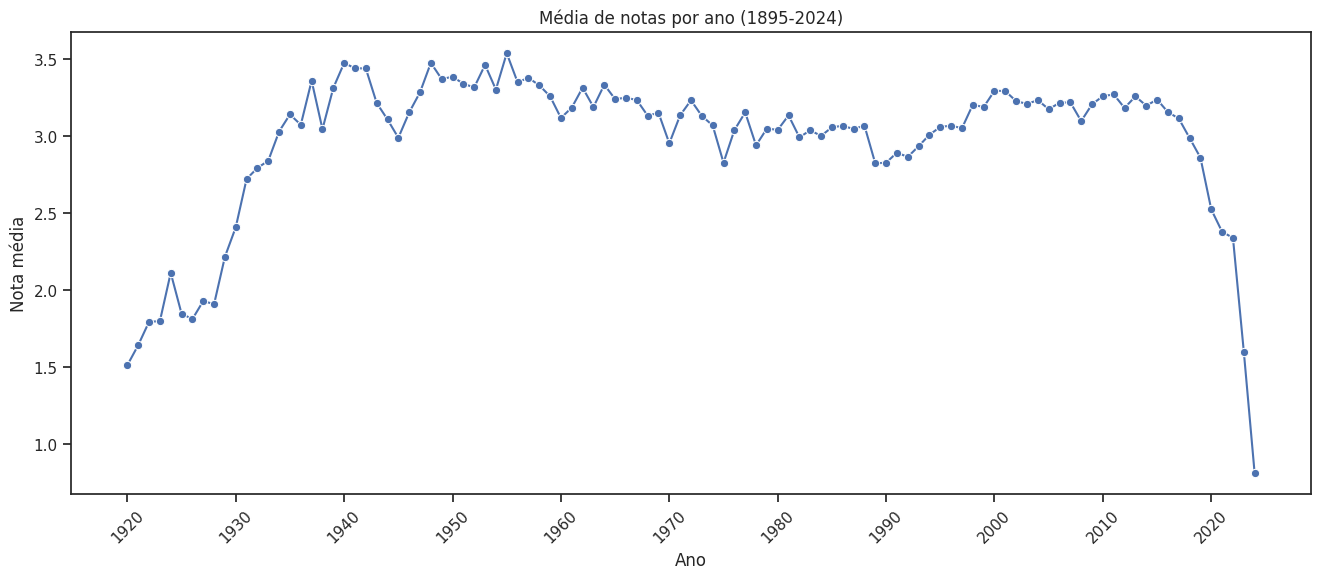

In [ ]:
# Converte a coluna 'vote_average' para número, valores inválidos viram NaN, release_date para datetime
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Filtra anos de 1895 a 2024
df_limpo = df.dropna(subset=['year', 'vote_average'])
df_limpo = df_limpo[(df_limpo['year'] >= 1920) & (df_limpo['year'] <= 2024)]

media_por_ano = df_limpo.groupby('year')['vote_average'].mean().sort_index()
print(media_por_ano)

sns.set_style('ticks')

# Gráfico 
plt.figure(figsize=(16,6))
sns.lineplot(x=media_por_ano.index, y=media_por_ano.values, marker='o')
plt.title("Média de notas por ano (1895-2024)")
plt.xlabel("Ano")
plt.ylabel("Nota média")

# Configura os intervalos do eixo X para 10 em 10 anos
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xticks(rotation=45)  

plt.show()

### 5.2 Sazonalidade de Lançamentos (por mês)

Este gráfico apresenta Sazonalidade de Lançamentos (por mês), facilitando a leitura de padrões e comparações relevantes.


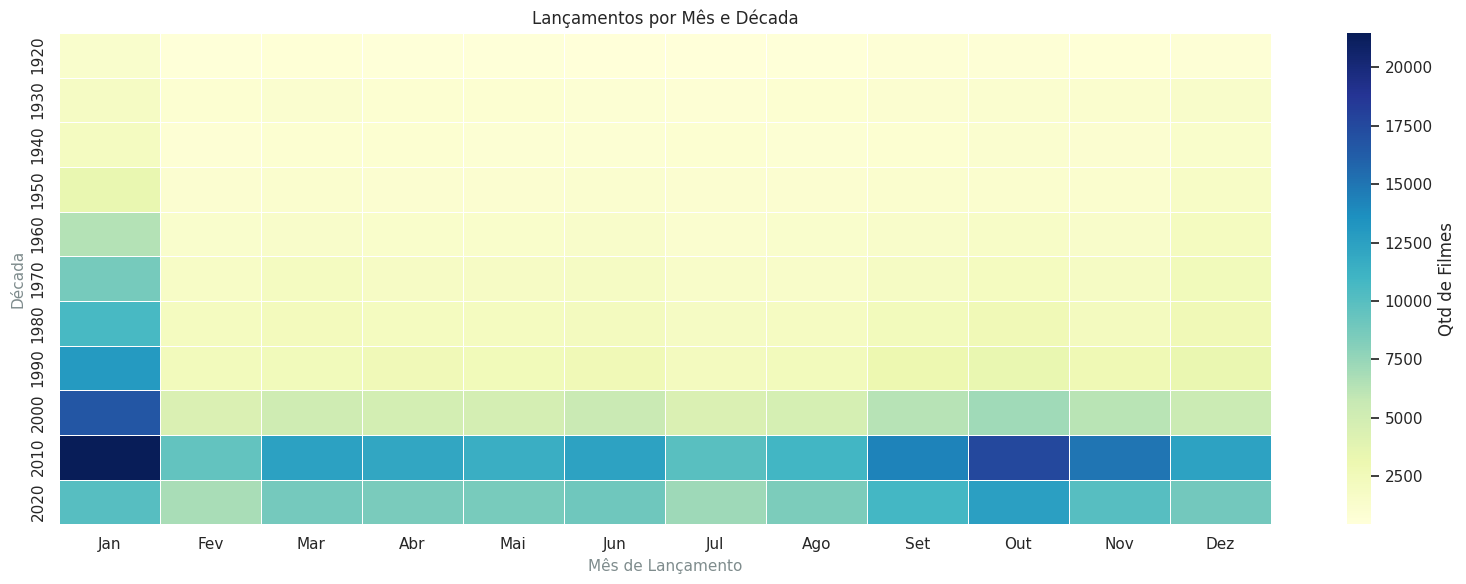

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_vendas = df[df['release_date'].notna()].copy()
df_vendas['month'] = df_vendas['release_date'].dt.month
df_vendas['decade'] = (df_vendas['release_date'].dt.year // 10 * 10).astype(int)
df_vendas = df_vendas[(df_vendas['year'] >= 1895) & (df_vendas['year'] <= 2024)]

# Matriz de contagem (Década vs Mês)
pivot_df = df_vendas.groupby(['decade', 'month']).size().unstack(fill_value=0)
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
pivot_df.columns = meses


plt.figure(figsize=(16, 6))
sns.set_theme(style="white")

# Plotagem com Heatmap
ax = sns.heatmap(
    pivot_df, 
    annot=False,          
    cmap='YlGnBu',       
    cbar_kws={'label': 'Qtd de Filmes'},
    linewidths=.5
)

# Estilização conforme seu padrão
plt.title('Lançamentos por Mês e Década')
plt.xlabel('Mês de Lançamento', fontsize=11, color='#7f8c8d')
plt.ylabel('Década', fontsize=11, color='#7f8c8d')

# Ajuste de layout
plt.tight_layout()
plt.show()

### 5.3 Evolução da Receita Total da Indústria Cinematográfica (1920-2024)

Este gráfico apresenta Evolução da Receita Total da Indústria Cinematográfica (1920-2024).

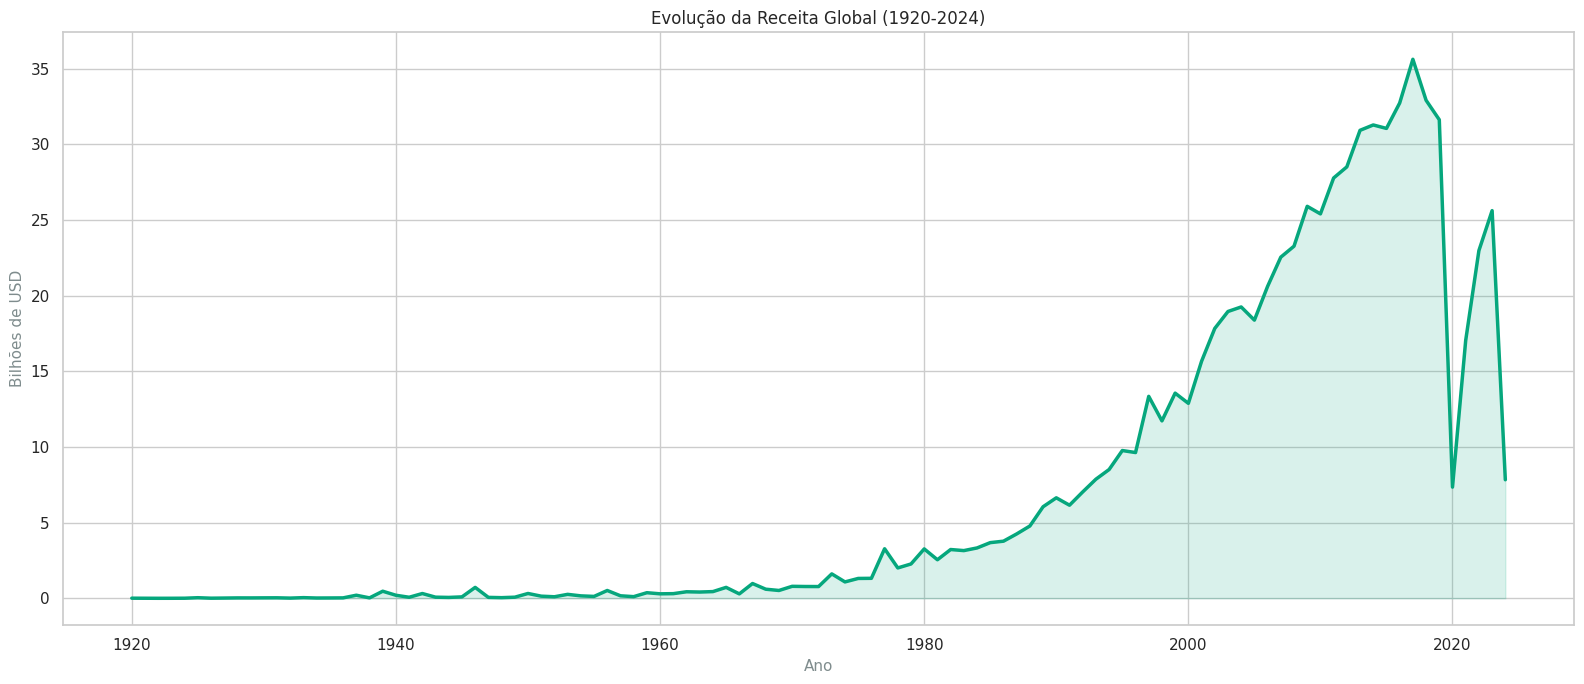

In [17]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

df_temporal = df[(df['year'] >= 1920) & (df['year'] <= 2024)].copy()
receita_por_ano = df_temporal.groupby('year')['revenue'].sum() / 1e9

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 7))

plt.plot(receita_por_ano.index, receita_por_ano.values, linewidth=2.5, color='#06A77D')
plt.fill_between(receita_por_ano.index, receita_por_ano.values, alpha=0.15, color='#06A77D')

plt.title('Evolução da Receita Global (1920-2024)',)
plt.xlabel('Ano', fontsize=11, color='#7f8c8d')
plt.ylabel('Bilhões de USD', fontsize=11, color='#7f8c8d')

plt.tight_layout()
plt.show()

##  6. Segmentação de Mercado e Produção

### 6.1 Contagem de Produtoras por Filme

Muitas vezes, filmes são produzidos por múltiplas produtoras. Abaixo, podemos ver a contagem de produtoras envolvidas na produção dos filmes.

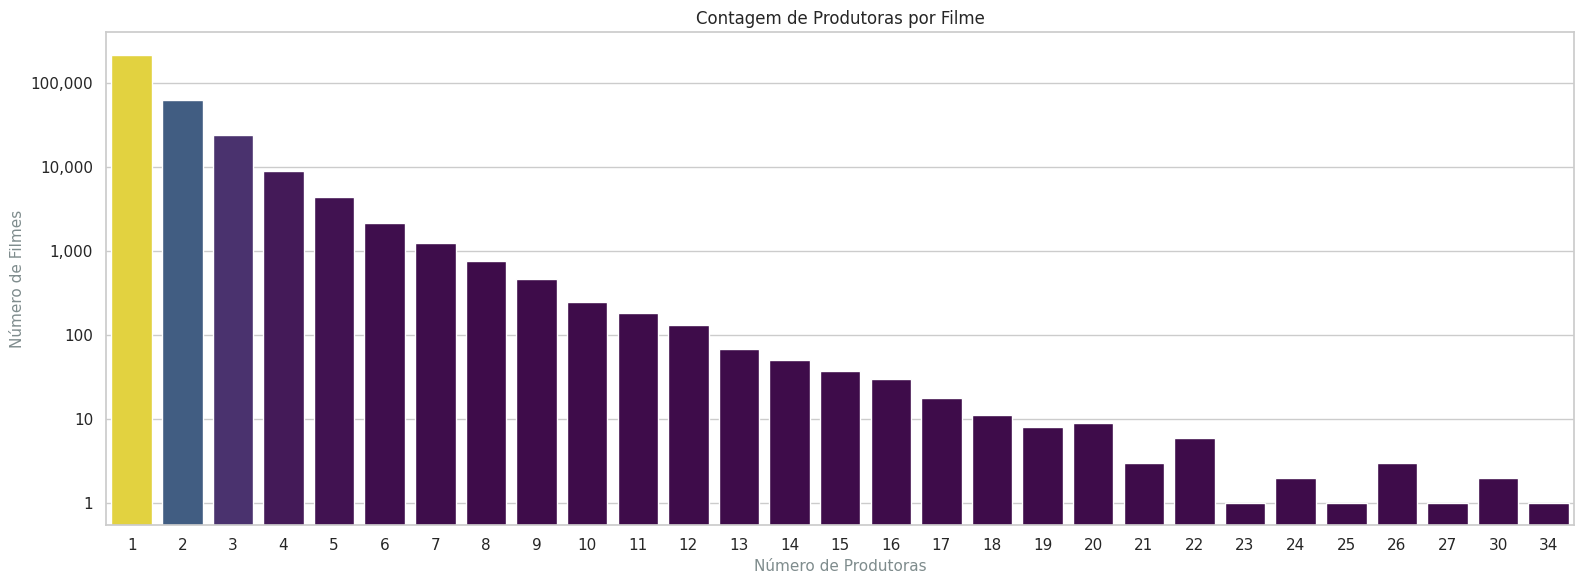

In [18]:
# Análise das Produtoras com Mais Filmes Produzidos

# Recarrega o df
#df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Contagem de produtoras por filme
from collections import Counter
produtora_counter = Counter()

for produtoras in df['production_companies'].dropna():
    # Contar quantidade de produtoras no filme
    produtoras_list = produtoras.split(',')
    produtoras_count = len(produtoras_list)
    produtora_counter[produtoras_count] += 1

# Converte o Counter para DataFrame para facilitar a plotagem
produtora_df = pd.DataFrame.from_dict(produtora_counter, orient='index', columns=['Número de Filmes'])
produtora_df.index.name = 'Número de Produtoras'
produtora_df = produtora_df.sort_index()

# Plotagem
plt.figure(figsize=(16,6))
ax = sns.barplot(
    x=produtora_df.index, 
    y=produtora_df['Número de Filmes'], 
    palette="viridis", 
    hue=produtora_df['Número de Filmes'], 
    legend=False)

ax.set_yscale('log')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.title("Contagem de Produtoras por Filme")
plt.xlabel("Número de Produtoras", fontsize=11, color='#7f8c8d')
plt.ylabel("Número de Filmes", fontsize=11, color='#7f8c8d')

plt.tight_layout()
plt.show()

### 6.2 Produtoras com Mais Filmes Produzidos

O objetivo desta análise é identificar as produtoras que mais contribuíram para a indústria cinematográfica em termos de quantidade de filmes produzidos.

O top 15 mudou considerávelmente após a retirada de filmes adultos e outliers, deixando uma representação mais real das produtoras dominantes no aspecto de produção de filmes

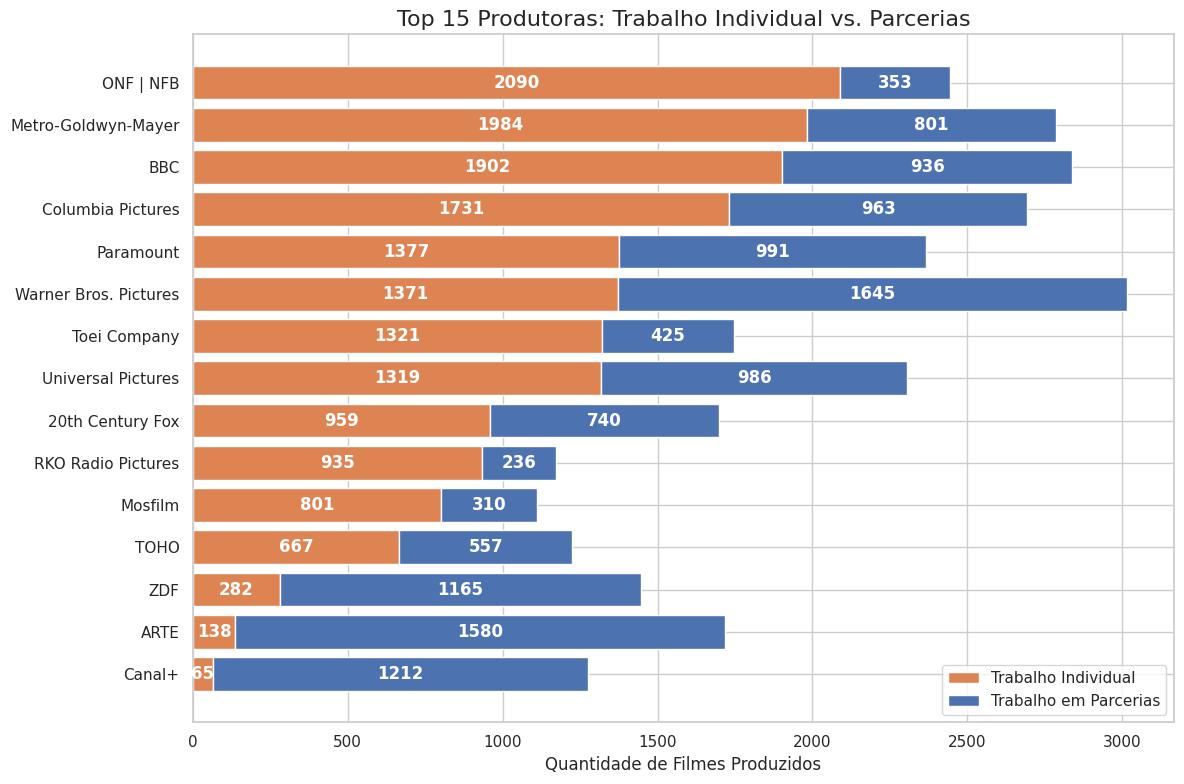

In [19]:

df['production_companies'] = df['production_companies'].fillna('')

# Filtrar strings vazias ANTES de fazer a contagem
df_filtered = df[df['production_companies'].str.strip() != '']

# Total de aparições
total_counts = df_filtered['production_companies'].str.split(', ').explode()
total_counts = total_counts[total_counts.str.strip() != ''].value_counts()

# Filmes solo (excluindo vazios)
solo_movies = df_filtered[~df_filtered['production_companies'].str.contains(',', na=False)]
solo_movies = solo_movies[solo_movies['production_companies'].str.strip() != '']
solo_counts = solo_movies['production_companies'].value_counts()

# Top 15 produtoras por total
top_15 = total_counts.head(15).index

# DataFrame para plot
df_plot = pd.DataFrame({
    'Produtora': top_15,
    'Individual': solo_counts.reindex(top_15, fill_value=0),
    'Parcerias': total_counts[top_15] - solo_counts.reindex(top_15, fill_value=0)
})

df_plot = df_plot.sort_values('Individual', ascending=True)

# --- Plotagem ---
fig, ax = plt.subplots(figsize=(12, 8))

# Barra individual
ax.barh(df_plot['Produtora'], df_plot['Individual'], color='#dd8452', label='Trabalho Individual')

# Barra de parceria
ax.barh(df_plot['Produtora'], df_plot['Parcerias'], 
        left=df_plot['Individual'], 
        color='#4c72b0', 
        label='Trabalho em Parcerias')

# Títulos e labels
ax.set_xlabel('Quantidade de Filmes Produzidos', fontsize=12)
ax.set_title('Top 15 Produtoras: Trabalho Individual vs. Parcerias', fontsize=16)
ax.set_ylabel('')
ax.legend(loc='lower right')

# Adicionar valores nas barras para melhor leitura
for i, (ind, par) in enumerate(zip(df_plot['Individual'], df_plot['Parcerias'])):
    if ind > 0:
        ax.text(ind/2, i, f'{int(ind)}', 
                ha='center', va='center', 
                color='white', fontweight='bold')
    if par > 0:
        ax.text(ind + par/2, i, f'{int(par)}', 
                ha='center', va='center', 
                color='white', fontweight='bold')

plt.tight_layout()
plt.show()


### 6.3 Análise da Receita por Quantidade de Produtoras

O objetivo é verificar se o número de produtoras impacta o sucesso financeiro do filme. Para evitar distorções causadas por sucessos isolados (outliers), focaremos na mediana da receita, buscando entender qual é o retorno financeiro mais realista e típico para cada cenário.

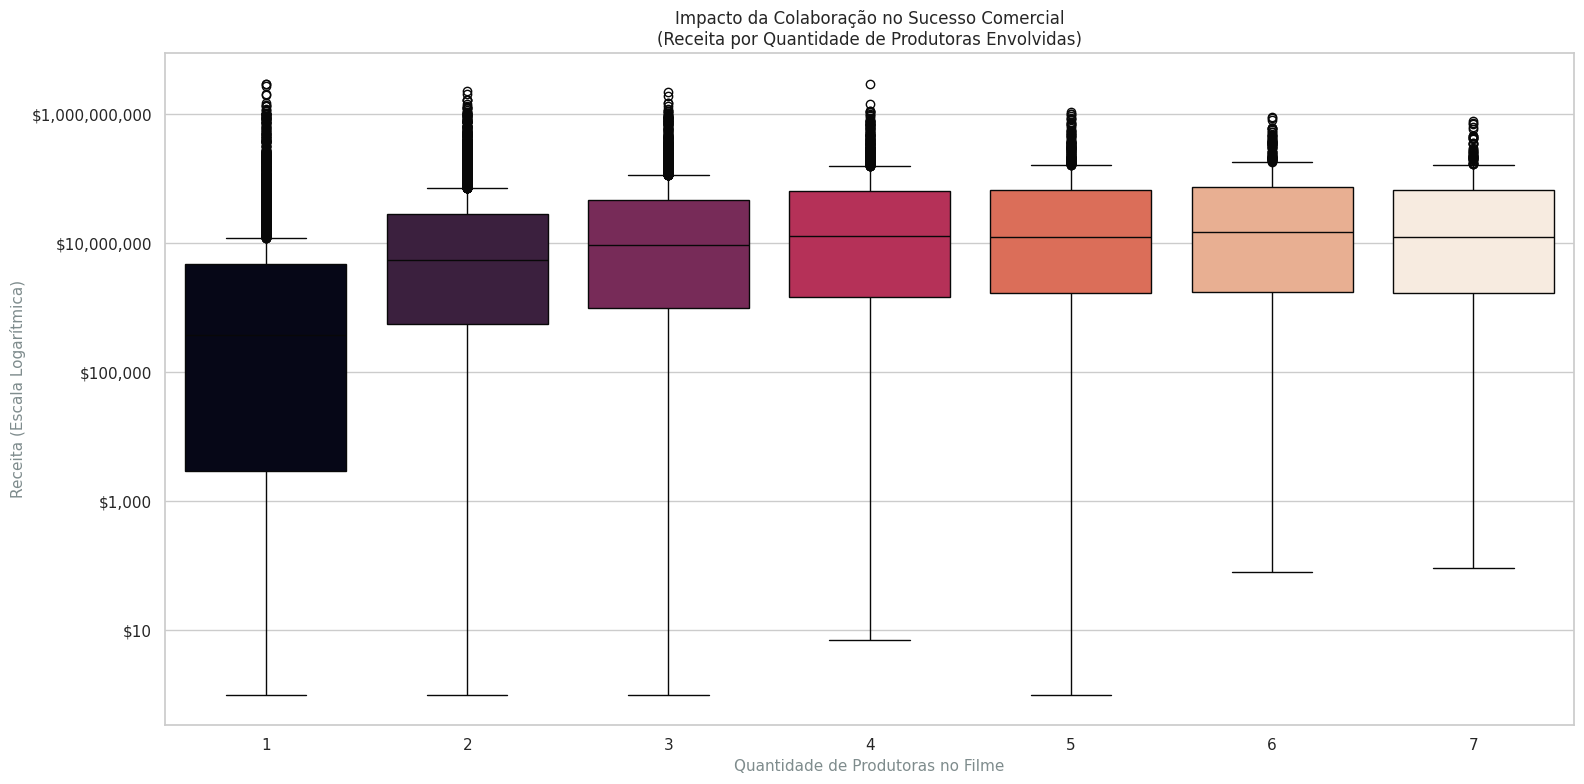

In [20]:
df['qtd_produtoras'] = df['production_companies'].fillna('a').apply(lambda x: len(str(x).split(',')))

df_financeiro = df[
    (df['qtd_produtoras'] <= 7) &
    (df['revenue'] > 0) 
]

plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(
    data=df_financeiro,
    x='qtd_produtoras',
    y='revenue',
    palette='rocket',
    hue='qtd_produtoras',
    legend=False
)

ax.set_yscale("log")

# Títulos e Labels
ax.set_title('Impacto da Colaboração no Sucesso Comercial\n(Receita por Quantidade de Produtoras Envolvidas)')
ax.set_xlabel('Quantidade de Produtoras no Filme', fontsize=11, color='#7f8c8d')
ax.set_ylabel('Receita (Escala Logarítmica)', fontsize=11, color='#7f8c8d')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '${:,.0f}'.format(y)))

plt.tight_layout()
plt.show()

### 6.4 Top 15 Gêneros por Receita Total

Este gráfico apresenta Top 15 Gêneros por Receita Total, facilitando a leitura de padrões e comparações relevantes.


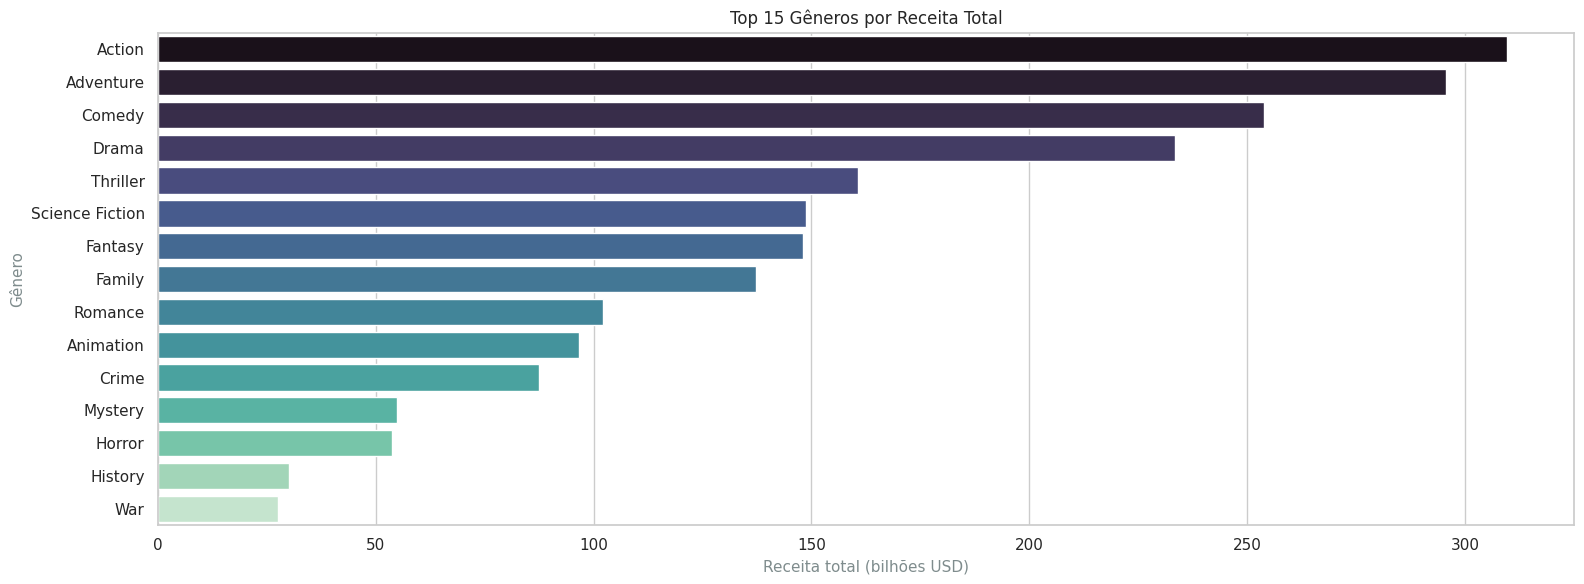

In [21]:
# Top 15 gêneros por receita total

df_gen = df[df["genres"].notna() & (df["revenue"] > 0)][["genres", "revenue"]].copy()
df_gen = df_gen.assign(genre=df_gen["genres"].str.split(", ")).explode("genre")
df_gen["genre"] = df_gen["genre"].str.strip()
df_gen = df_gen[(df_gen["genre"] != "") & (df_gen["genre"] != "nan")]

genre_revenue = df_gen.groupby("genre")["revenue"].sum().nlargest(15).reset_index()
genre_revenue["revenue_bi"] = genre_revenue["revenue"] / 1e9

plt.figure(figsize=(16, 6))

sns.barplot(
    data=genre_revenue, 
    x="revenue_bi", 
    y="genre", 
    color="#4C78A8", 
    hue="genre",
    palette="mako",
    legend=False)

plt.xlabel("Receita total (bilhões USD)", fontsize=11, color='#7f8c8d')
plt.ylabel("Gênero", fontsize=11, color='#7f8c8d')
plt.title("Top 15 Gêneros por Receita Total")

plt.tight_layout()
plt.show()


### 6.5 Top 15 Países Produtores (por volume)

Este gráfico apresenta Top 15 Países Produtores (por volume), facilitando a leitura de padrões e comparações relevantes.


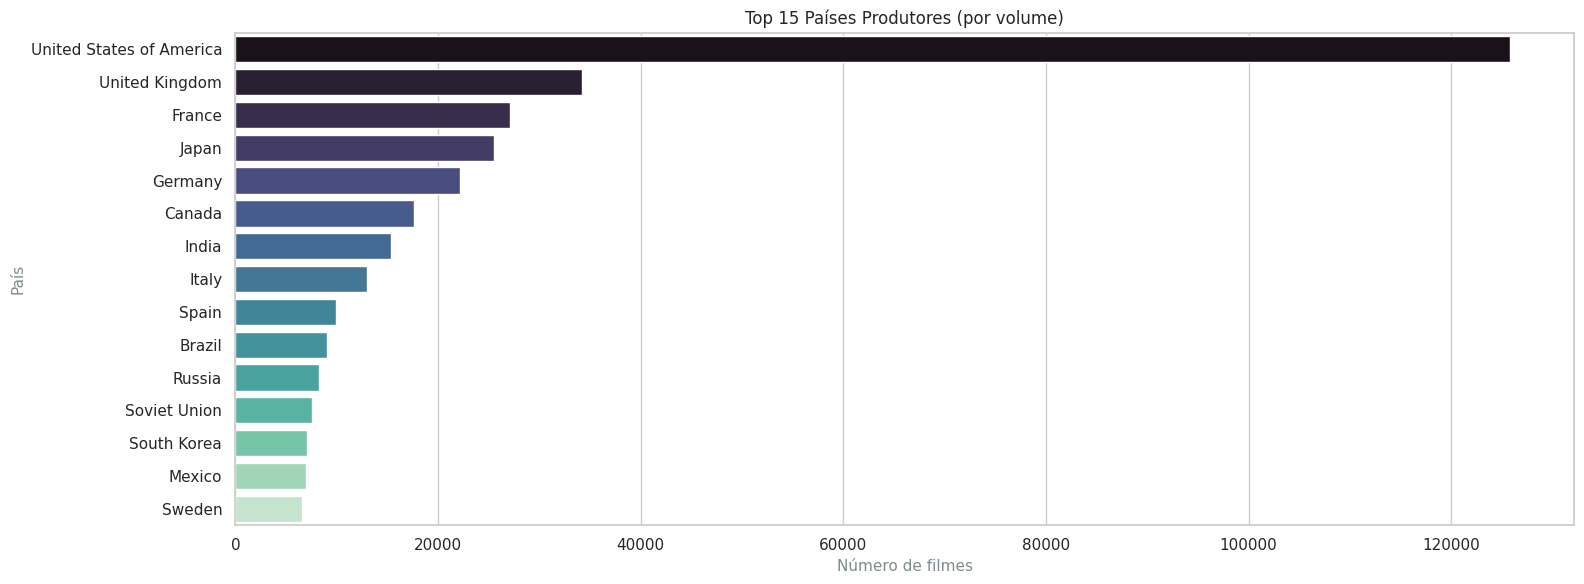

In [22]:
# Top 15 países produtores (por volume)

df_country = df[df["production_countries"].notna()][["production_countries"]].copy()
df_country = df_country.assign(country=df_country["production_countries"].str.split(", ")).explode("country")
df_country["country"] = df_country["country"].str.strip()
df_country = df_country[(df_country["country"] != "") & (df_country["country"] != "nan")]

country_counts = df_country["country"].value_counts().head(15).reset_index()
country_counts.columns = ["country", "count"]

plt.figure(figsize=(16, 6))

sns.barplot(data=country_counts, x="count", y="country", hue="country", palette="mako", legend=False)
plt.xlabel("Número de filmes", fontsize=11, color='#7f8c8d')
plt.ylabel("País", fontsize=11, color='#7f8c8d')
plt.title("Top 15 Países Produtores (por volume)")

plt.tight_layout()
plt.show()


### 6.6 Correlação entre Variáveis Financeiras e Popularidade
O gráfico busca verificar se há relação entre variáveis de popularidade com o investimento e/ou o lucro gerado pelo filme. 

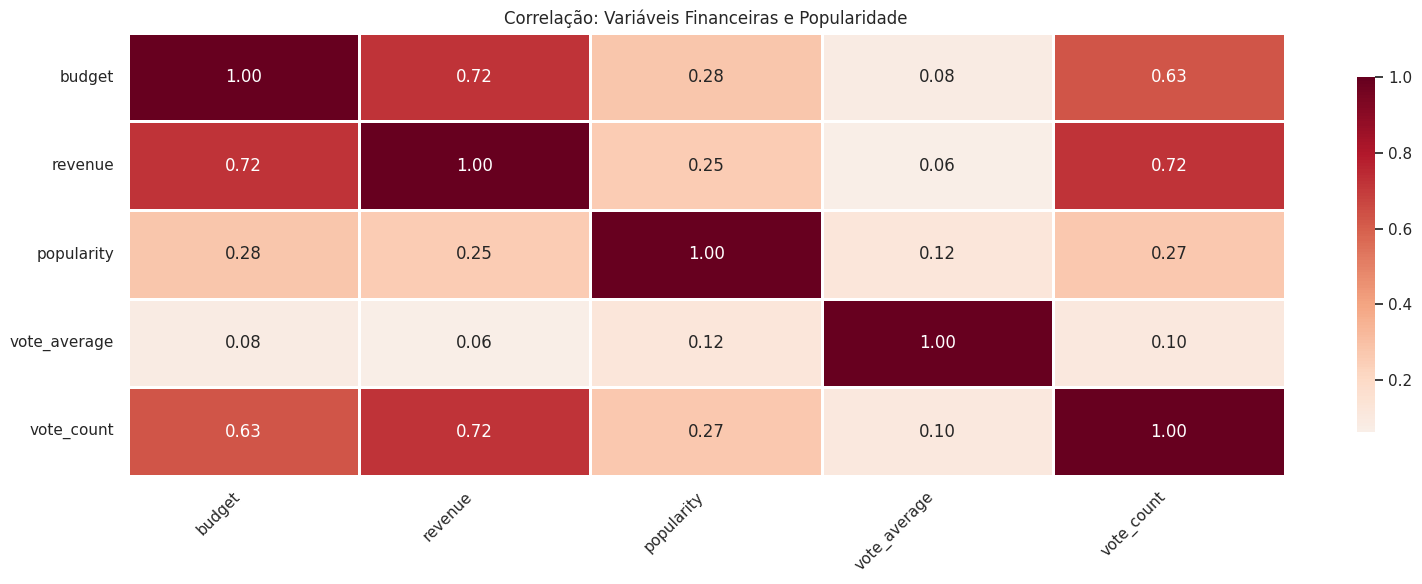

In [23]:
cols_fin = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']
corr_matrix = df[cols_fin].corr()

sns.set_theme(style="white")
plt.figure(figsize=(16, 6))

# Heatmap refinado
ax = sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='RdBu_r',       
    fmt=".2f", 
    center=0,           
    linewidths=1, 
    cbar_kws={"shrink": .8},
    square=False
)

plt.title('Correlação: Variáveis Financeiras e Popularidade')

# Ajuste fino das etiquetas dos eixos
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### 6.7 Duração x Popularidade

Este gráfico apresenta a relação entre a duração dos filmes (runtime) e sua pontuação de popularidade (popularity). Cada ponto representa um filme do dataset, permitindo identificar padrões gerais e a presença de valores atípicos. Observa-se que a maioria dos filmes se concentra em durações médias, enquanto alguns títulos com tempo de exibição muito elevado ou muito reduzido se destacam como outliers. A visualização também possibilita analisar se filmes mais longos tendem, ou não, a apresentar maior popularidade junto ao público.

Após a limpeza de outliers é visivel que existem algumas exceções no aspecto de duração de filme, o gráfico está certamente diferente em relação ao anterior, justificando o que achavamos ser outliers, são apenas valores de exceção

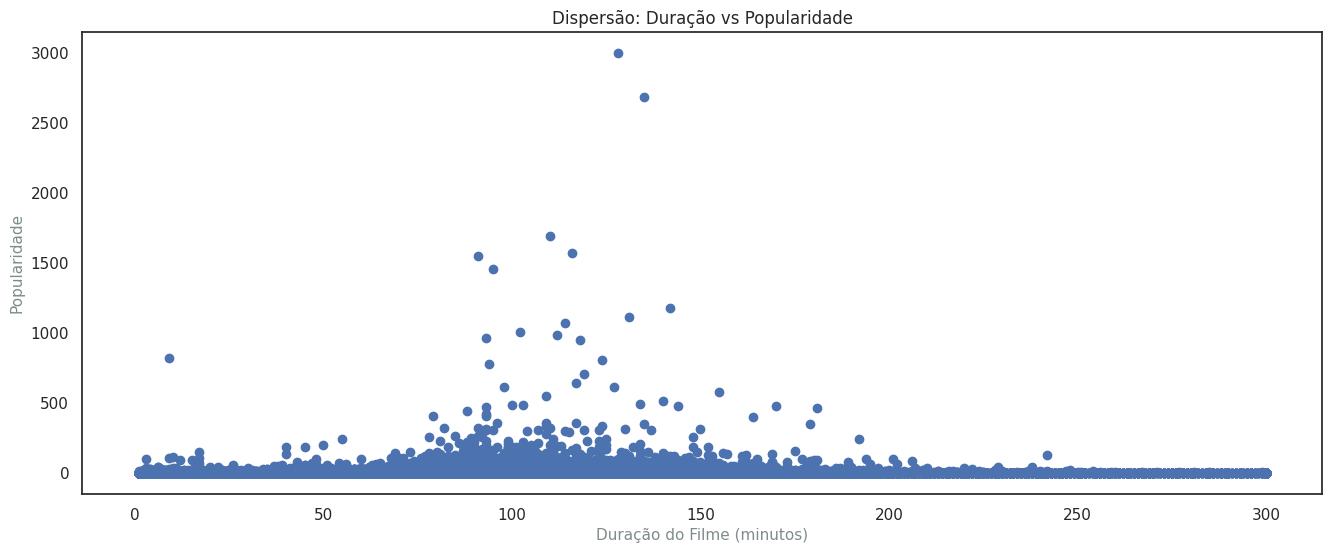

Top 10 filmes com maior pontuação de popularidade:
               title  runtime  popularity
0        Blue Beetle    128.0    2994.357
1       Gran Turismo    135.0    2680.593
2         The Nun II    110.0    1692.778
3  Meg 2: The Trench    116.0    1567.273
4        Retribution     91.0    1547.220
5         Talk to Me     95.0    1458.514
6             Fast X    142.0    1175.267
7   Sound of Freedom    131.0    1111.036
8             Barbie    114.0    1069.340
9          Elemental    102.0    1008.942

Top 10 filmes maior duração:
                                      title  runtime  popularity
1110231              i missed my other half    300.0      0.0000
450715               An Old-Fashioned Story    300.0      0.6000
911931             Attack on Titan Season 3    300.0      0.1071
135269                        Asura's Wrath    300.0      1.4310
610522            Voices From Hitler's Army    300.0      0.6000
235597                Terry and the Pirates    300.0      0.9880
88

In [24]:
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df_limpo = df.dropna(subset=['runtime', 'popularity'])
df_limpo = df_limpo[(df_limpo['runtime'] >= 1) & (df_limpo['runtime'] <= 2000)]

# Gráfico de dispersão
plt.figure(figsize=(16, 6))
plt.scatter(df_limpo['runtime'], df_limpo['popularity'])
plt.title('Dispersão: Duração vs Popularidade')
plt.xlabel('Duração do Filme (minutos)', fontsize=11, color='#7f8c8d')
plt.ylabel('Popularidade', fontsize=11, color='#7f8c8d')
plt.show()

# Define rankings
popularityRank = df.sort_values(by='popularity', ascending=False).head(10)
runtimeRank = df.sort_values(by='runtime', ascending=False).head(10)

# Selecionar colunas relevantes
resultado = popularityRank[['title', 'runtime', 'popularity']]

print("Top 10 filmes com maior pontuação de popularidade:")
print(resultado)

resultado = runtimeRank[['title', 'runtime', 'popularity']]
print("\nTop 10 filmes maior duração:")
print(resultado)


## 7. Análise Financeira

### 7.1 Heatmap de ROI médio por década e gênero (top 8)
Este gráfico apresenta Heatmap de ROI médio por década e gênero (top 8), facilitando a leitura de padrões e comparações relevantes.

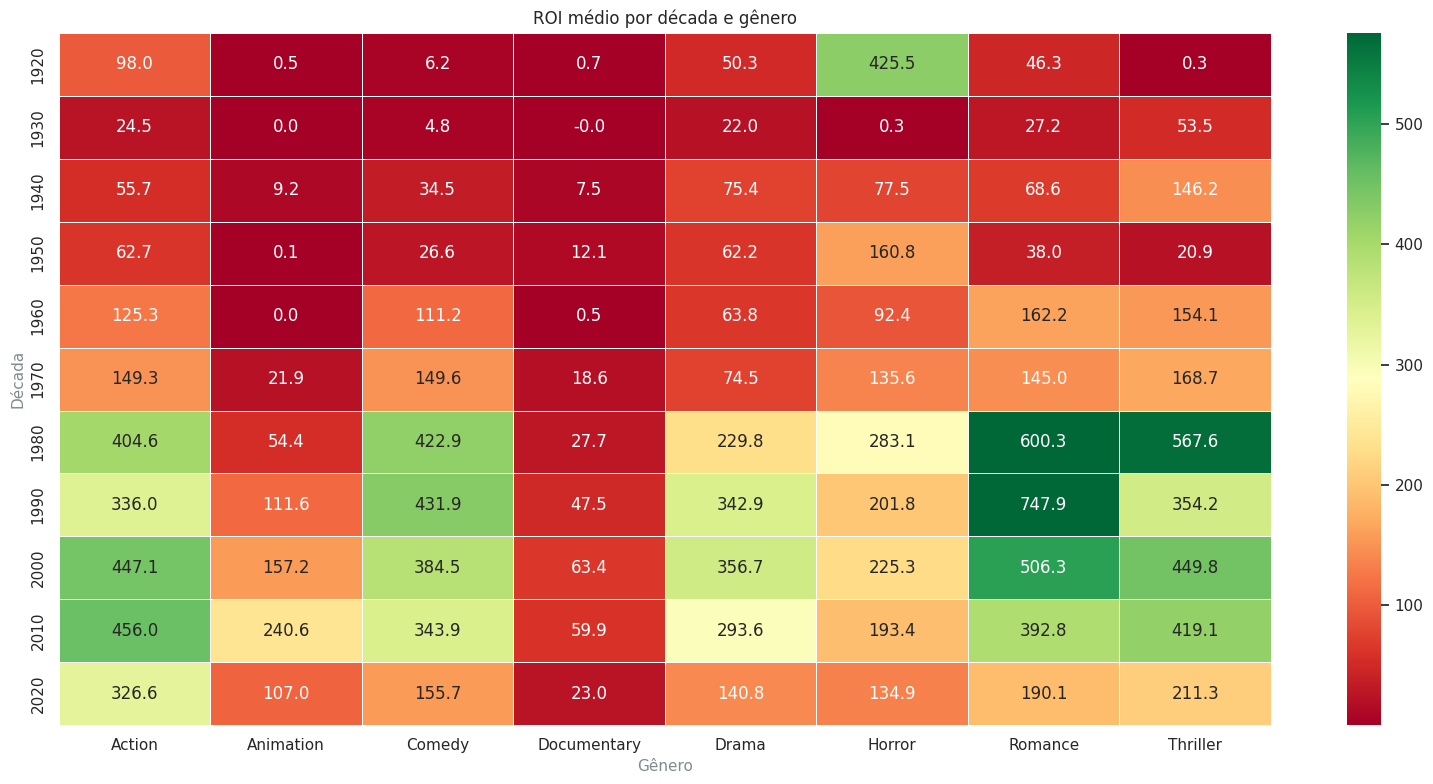

In [25]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
df['roi'] = (df['revenue'] - df['budget']) / df['budget'].replace(0, 1)

# Filtra de 1920 até o fim da década de 2020
df = df[(df['year'] >= 1920) & (df['year'] <= 2024)].copy()
df['decade'] = (df['year'] // 10 * 10).fillna(0).astype(int).astype(str)

roi_cap_99 = df['roi'].quantile(0.99)
df_gen_roi = df[df["genres"].notna()][["genres", "roi", "decade"]].copy()
df_gen_roi["roi"] = df_gen_roi["roi"].clip(upper=roi_cap_99)

df_gen_roi = df_gen_roi.assign(genre=df_gen_roi["genres"].str.split(", ")).explode("genre")
df_gen_roi["genre"] = df_gen_roi["genre"].str.strip()
df_gen_roi = df_gen_roi[df_gen_roi["genre"] != ""]

top_genres = df_gen_roi["genre"].value_counts().head(8).index
pivot_gen = df_gen_roi[df_gen_roi["genre"].isin(top_genres)].groupby(["decade", "genre"])["roi"].mean().unstack()
pivot_gen = pivot_gen.sort_index()

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_gen, cmap="RdYlGn", annot=True, fmt=".1f", linewidths=0.5, robust=True)

plt.title("ROI médio por década e gênero",)
plt.xlabel("Gênero", fontsize=11, color='#7f8c8d')
plt.ylabel("Década", fontsize=11, color='#7f8c8d')

plt.tight_layout()
plt.show()

### 7.2 Orçamento vs Lucro

Este gráfico apresenta Orçamento vs Lucro, facilitando a leitura de padrões e comparações relevantes.

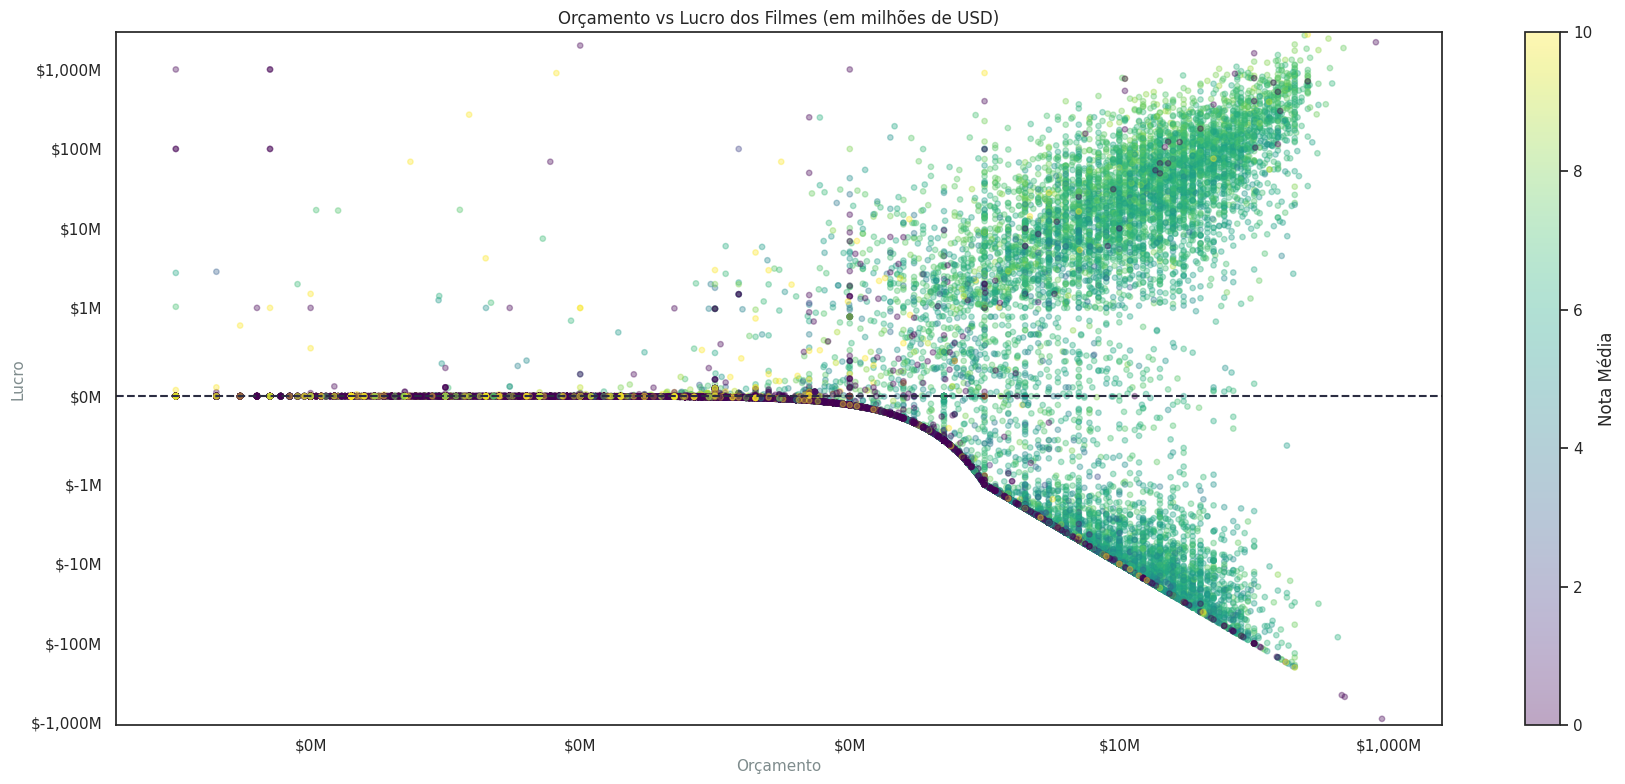

In [26]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['profit'] = df['revenue'] - df['budget']
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce').fillna(0)

df_plot = df[df['budget'] > 0].copy()
if len(df_plot) > 50000:
    df_plot = df_plot.sample(50000, random_state=42)

plt.figure(figsize=(18, 8))
sc = plt.scatter(df_plot["budget"] / 1e6, df_plot["profit"] / 1e6,
                 alpha=0.35, s=15, c=df_plot["vote_average"], cmap="viridis")

plt.colorbar(sc, label="Nota Média")
plt.xscale("log")
plt.yscale("symlog", linthresh=1)
plt.axhline(0, color="#2B2D42", linestyle="--", linewidth=1.5)

# formatar log e symlog em USD
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '${:,.0f}M'.format(y)))

plt.xlabel("Orçamento", fontsize=11, color='#7f8c8d')
plt.ylabel("Lucro", fontsize=11, color='#7f8c8d')
plt.title("Orçamento vs Lucro dos Filmes (em milhões de USD)")


plt.tight_layout()
plt.show()